| Name  | Surname   | Student No  | Department  |
|---|---|---|---|
| Emin  | Kartci  | S014877  | EE Engineering  |
|Ozan | Yurtsever | S015164 | EE Engineering |
|Yamaç Demirkan| Yılmaz |S018368 |Computer Science|
|Muhammed Ali |Kumaşoğlu| S018505|EE Engineering |



## If you cannot use foluim library, you can still execute the simulation
## Only difference will be that you cannot see the results at the google map

In [32]:
# If you do not have the libraries INSTALL THEM

#!pip3 install foursquare
#!pip3 install folium
#!pip3 install geopy

In [33]:
# To interact with user use ipywidgets library - Generate a simple GUI
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time

# import pandas and json to handle data
import pandas as pd
import json 

# import manuel libraries
from Company import Company
from SimulationLibrary import SimulationEnvironment

# Mapping libraries
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests
import pandas as pd
import folium
from folium import plugins



ModuleNotFoundError: No module named 'folium'

In [52]:
# DEFINE THE IPYWIDGETS

# title - start
programLabel = widgets.Label('-------------------------->  RESTAURANT SIMULATOR PROGRAM  <--------------------------', layout=widgets.Layout(width='100%'))

# company info
companyName = widgets.Text(description="Comp. Name",value="Example LTD",layout=widgets.Layout(width="50%"))
longitude = widgets.Text(description="Longitude",value="40.730610",layout=widgets.Layout(width="30%"))
latitude = widgets.Text(description="Latitude",value="-73.935242",layout=widgets.Layout(width="30%"))
infoLabel = widgets.Label('------!  You have to define a location around NEWYORK ## Center 40.74 & -73.94 ## !------', layout=widgets.Layout(width='100%'))
# break
br1Label = widgets.Label('-----------------------------------------------------------------------------------------------------', layout=widgets.Layout(width='100%'))

# services
servicesLabel = widgets.Label('Select Services:', layout=widgets.Layout(width='100%'))
Dessertbox = widgets.Checkbox(False, description='Dessert')
Saladbox = widgets.Checkbox(False, description='Salad')
Drinkbox = widgets.Checkbox(False, description='Drink')

# break
br2Label = widgets.Label('-----------------------------------------------------------------------------------------------------', layout=widgets.Layout(width='100%'))

# product info - income statement parameters
expectedPriceLabel = widgets.Label('Expected Average Price:', layout=widgets.Layout(width='100%'))
expectedAveragePrice = widgets.IntSlider(min=10, max=100, step=1, description='(Euro): ',value=0)

expectedUnitCostLabel = widgets.Label('Expected Average Unit Cost:', layout=widgets.Layout(width='100%'))
expectedUnitCost = widgets.IntSlider(min=5, max=50, step=1, description='(Euro): ',value=0)

expectedSalesLabel = widgets.Label('Expected Sales Monthly:', layout=widgets.Layout(width='100%'))
expectedSales = widgets.IntSlider(min=5000, max=10000, step=1, description='(Euro): ',value=0)

# company expenses
fixedCostLabel = widgets.Label('Fixed Costs:', layout=widgets.Layout(width='100%'))
fixedCost = widgets.FloatText(value=10000, description='(Euro): ',color = 'blue')

taxRateLabel = widgets.Label('Tax Rate:', layout=widgets.Layout(width='100%'))
taxRate = widgets.FloatSlider(min=5, max=100, step=1, description='%: ',value=0)

# break - finish
br3Label = widgets.Label('-----------------------------------------------------------------------------------------------------', layout=widgets.Layout(width='100%'))

In [53]:
# This function gets the ipywidget checkboxes and creates a proper list 
# that will be used at the COMPANY Class.

# create a string list bu considering checkbox widgets
def set_service_list():
    
    # create an empty list
    serviceList = []
    
    # if it is checked
    if Dessertbox.value:
        # add to the list
        serviceList.append('Dessert')
    # if it is checked
    if Saladbox.value:
        # add to the list
        serviceList.append('Salad')
    # if it is checked
    if Drinkbox.value:
        # add to the list
        serviceList.append('Drink')
    
    # return the list
    return serviceList

In [54]:
# IMPORTANT 

# Before here you MUST run at leas 1 time to libraries
# and also definition of these objects



# display the widgets that I defined Here  
display(programLabel)

display(companyName)
display(longitude)
display(latitude)
display(infoLabel)
display(br2Label)


display(servicesLabel)
display(Dessertbox)
display(Saladbox)
display(Drinkbox)

display(br2Label)

display(expectedPriceLabel)
display(expectedAveragePrice)

display(expectedUnitCostLabel)
display(expectedUnitCost)

display(expectedSalesLabel)
display(expectedSales)

display(fixedCostLabel)
display(fixedCost)

display(taxRateLabel)
display(taxRate)

display(br3Label)


# HERE PLEASE TYPE YOUR COMPANY'S INFORMATION

Label(value='-------------------------->  RESTAURANT SIMULATOR PROGRAM  <--------------------------', layout=L…

Text(value='Example LTD', description='Comp. Name', layout=Layout(width='50%'))

Text(value='40.730610', description='Longitude', layout=Layout(width='30%'))

Text(value='-73.935242', description='Latitude', layout=Layout(width='30%'))

Label(value='------!  You have to define a location around NEWYORK ## Center 40.74 & -73.94 ## !------', layou…

Label(value='-------------------------------------------------------------------------------------------------…

Label(value='Select Services:', layout=Layout(width='100%'))

Checkbox(value=False, description='Dessert')

Checkbox(value=False, description='Salad')

Checkbox(value=False, description='Drink')

Label(value='-------------------------------------------------------------------------------------------------…

Label(value='Expected Average Price:', layout=Layout(width='100%'))

IntSlider(value=10, description='(Euro): ', min=10)

Label(value='Expected Average Unit Cost:', layout=Layout(width='100%'))

IntSlider(value=5, description='(Euro): ', max=50, min=5)

Label(value='Expected Sales Monthly:', layout=Layout(width='100%'))

IntSlider(value=5000, description='(Euro): ', max=10000, min=5000)

Label(value='Fixed Costs:', layout=Layout(width='100%'))

FloatText(value=10000.0, description='(Euro): ')

Label(value='Tax Rate:', layout=Layout(width='100%'))

FloatSlider(value=5.0, description='%: ', min=5.0, step=1.0)

Label(value='-------------------------------------------------------------------------------------------------…

In [55]:
# Create the environment and the company
SimEnv = SimulationEnvironment()

# if the location input is too far away ask a new location 
distanceFromCenter = SimEnv.calculate_distance_lon_lat(float(longitude.value),float(latitude.value),40.730610,-73.935242)

# if location is greater then 10000 KM
if distanceFromCenter > 10000:
    # inform the user
    print("Check Your Location:\nLon: {}\nLat: {}\nDistance from center: {}\nSelect it again!! Otherwise your location will be considered as center!!".format(longitude.value,latitude.value,distanceFromCenter))
    # take the center as location 40.74 & -73.94
    company = Company(companyName.value,40.74,-73.94,set_service_list(),expectedAveragePrice.value,expectedUnitCost.value,expectedSales.value,fixedCost.value,taxRate.value)
else:
    # create a company object
    company = Company(companyName.value,longitude.value,latitude.value,set_service_list(),expectedAveragePrice.value,expectedUnitCost.value,expectedSales.value,fixedCost.value,taxRate.value)
    # print income statement



In [56]:
# Describe the company
company.print_company_description()

# save the company properties as txt file
# company.save_company_description_to()



            Company Name: Example LTD

            Location:
                - Longitude : 40.730610° N
                - Latitude  : -73.935242° E

            Services:
            
            There is no service !!
            
            Average Price      : 10
            Average Unit Cost  : 5

            Sales Volume       : 5000

            Fixed Cost         : 10000.0

            Tax Rate           : 0.05


        


In [57]:
# Show the income statement of the company
company.print_income_statement()

# Save income statement as txt
#company.save_income_statement()



                    ==========  Example LTD's MONTHLY INCOME STATEMENT  ==========
                   +------------------------------------------------------
                   | Unit Price    : 10
                   | Unit Cost     : 5
                   +------------------
                   | Contribution Margin : 5
                   | Sales Volume        : 5000
                   | Revenue             : 50000 (Monthly)
                   +------------------
                   | Cost of Goods Sold  : 25000 (Monthly)
                   | Total Fixed Cost    : 10000.0 (Monthly)
                   | Total Cost          : 35000.0
                   +------------------
                   | Gross Margin        : 25000
                   | Taxes               : 1250.0
                   +------------------
                   | NET INCOME          : 23750.0
                   +------------------------------------------------------


        


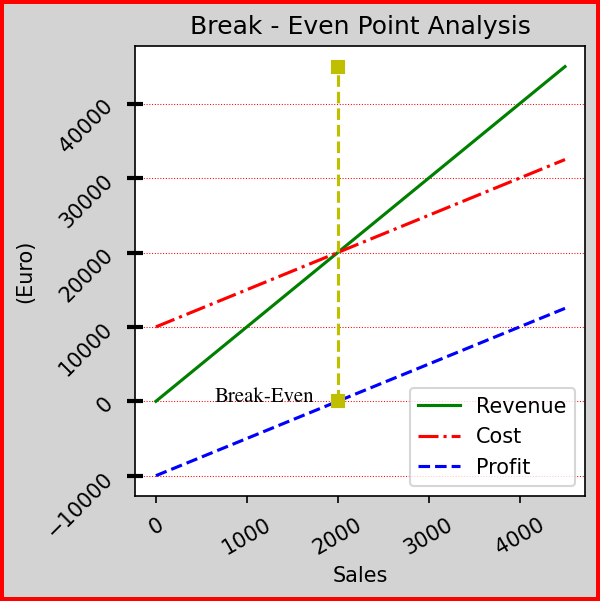

In [58]:
# plot break-even analysis
company.plot_break_even_point()

In [59]:
# CONSIDERING BORROWING OPTIONS

# Future Value

#     You can convert your money to the future value with a defined number of period 
# and certain interest rate


# create GUI objects
PresentValueLabel = widgets.Label('Present Value:', layout=widgets.Layout(width='100%'))
PresentValue = widgets.FloatText(value=1000, description='(Euro): ',continous_update = True)

FutureValueLabel = widgets.Label('Future Value:', layout=widgets.Layout(width='100%'))
FuturetValue = widgets.FloatText(SimEnv.calculate_FV(PresentValue.value,1,0.1), description='(Euro): ',disabled = True)

PeriodValueLabel = widgets.Label('Period Number:', layout=widgets.Layout(width='100%'))
PeriodValue = widgets.FloatText(1, description='Years: ')

RateValueLabel = widgets.Label('Annually Interest Rate:', layout=widgets.Layout(width='100%'))
RateValue = widgets.FloatText(0.10, description='Rate: ')

FV_Calculate_Button = widgets.Button(description="Calculate!")
FV_output = widgets.Output()


# when the button is clicked
def on_button_clicked(b):
    with FV_output:
        # assign new values
        FuturetValue.value = SimEnv.calculate_FV(PresentValue.value,int(PeriodValue.value),float(RateValue.value))

# Display them
display(PresentValueLabel)
display(PresentValue)

display(FutureValueLabel)
display(FuturetValue)

display(PeriodValueLabel)
display(PeriodValue)

display(RateValueLabel)
display(RateValue)


display(FV_Calculate_Button,FV_output)
FV_Calculate_Button.on_click(on_button_clicked)
    
    

Label(value='Present Value:', layout=Layout(width='100%'))

FloatText(value=1000.0, description='(Euro): ')

Label(value='Future Value:', layout=Layout(width='100%'))

FloatText(value=1100.0, description='(Euro): ', disabled=True)

Label(value='Period Number:', layout=Layout(width='100%'))

FloatText(value=1.0, description='Years: ')

Label(value='Annually Interest Rate:', layout=Layout(width='100%'))

FloatText(value=0.1, description='Rate: ')

Button(description='Calculate!', style=ButtonStyle())

Output()

In [60]:
# CONSIDERING BORROWING OPTIONS

# Present Value

#     You can convert your money to the present value with a defined number of period 
# and certain interest rate


# create GUI objects
PresentValueLabel = widgets.Label('Present Value:', layout=widgets.Layout(width='100%'))
PresentValue = widgets.FloatText(SimEnv.calculate_PV(PresentValue.value,int(PeriodValue.value),0.1), description='(Euro): ',continous_update = True,disabled = True)

FutureValueLabel = widgets.Label('Future Value:', layout=widgets.Layout(width='100%'))
FuturetValue = widgets.FloatText(value=1000, description='(Euro): ')

PeriodValueLabel = widgets.Label('Period Number:', layout=widgets.Layout(width='100%'))
PeriodValue = widgets.FloatText(1, description='Years: ')

RateValueLabel = widgets.Label('Annually Interest Rate:', layout=widgets.Layout(width='100%'))
RateValue = widgets.FloatText(0.10, description='Rate: ')

FV_Calculate_Button = widgets.Button(description="Calculate!")
FV_output = widgets.Output()

# when the button is clicked
def on_button_clicked(b):
    with FV_output:
        # assign calculated results
        PresentValue.value = SimEnv.calculate_PV(FuturetValue.value,int(PeriodValue.value),float(RateValue.value))


# display them
display(PresentValueLabel)
display(PresentValue)

display(FutureValueLabel)
display(FuturetValue)

display(PeriodValueLabel)
display(PeriodValue)

display(RateValueLabel)
display(RateValue)


display(FV_Calculate_Button,FV_output)
FV_Calculate_Button.on_click(on_button_clicked)
    
    

Label(value='Present Value:', layout=Layout(width='100%'))

FloatText(value=909.090909090909, description='(Euro): ', disabled=True)

Label(value='Future Value:', layout=Layout(width='100%'))

FloatText(value=1000.0, description='(Euro): ')

Label(value='Period Number:', layout=Layout(width='100%'))

FloatText(value=1.0, description='Years: ')

Label(value='Annually Interest Rate:', layout=Layout(width='100%'))

FloatText(value=0.1, description='Rate: ')

Button(description='Calculate!', style=ButtonStyle())

Output()

In [61]:
# SIMULATION EXECUTIONS

# define constants
tax_rate = 20

# simulation environment is alreadt created as SimEnv but redefine it
SimEnv = SimulationEnvironment(customerCount=10000)



In [63]:
serviceList = ["Desert","Salad","Tea","Dinner","Kebap","Wine","Drink","Ice Cream"]
competitorList = []

#try to get closest 4 competitor companies
try:
    # you can make True if you want to see results
    competitorsPandasForm = SimEnv.get_closest_competitors(float(company.longitude),float( company.latitude),willPrint=False)
    
    # get 4 competitirs
    for index in range(4):
        
        # create object
        competitor = Company(competitorsPandasForm["NAME"][index]      ,competitorsPandasForm["LONGITUDE"][index]   ,competitorsPandasForm["LATITUDE"][index]   ,random.choices(serviceList,k = 3) ,
                              random.randint(10,20)  ,random.randint(5,10)  ,random.randint(10000,30000) ,random.randint(150000,300000),tax_rate)
        
        # append the list
        competitorList.append(competitor)
    
    
#If any problem occurs while reading the objcets
except:
    # you can define your competitors properties manually
                        # NAME              LOCATION   SERVICES         PRICE COST  SALES FIXED COST
    competitor1 = Company("Happy Moon"      ,25,63,["Desert","Salad"]    ,26  ,11  ,44533 ,21333     ,tax_rate)
    competitor2 = Company("Fell Falafel"    ,23,63,["Dinner","Salad"]    ,16  ,13  ,24533 ,23633     ,tax_rate)
    competitor3 = Company("Kartci's Place"  ,21,65,["Desert","Breakfast"],36  ,9   ,64533 ,23343     ,tax_rate)
    competitor4 = Company("Nusret"          ,22,61,["Tea","Dring"]       ,46  ,26  ,77533 ,23233     ,tax_rate)
    
    competitorList.append(competitor1)
    competitorList.append(competitor2)
    competitorList.append(competitor3)
    competitorList.append(competitor4)


# show competitor List
for competitor in competitorList:
    # print description
    competitor.print_company_description()

# print table    
competitorsPandasForm






            Company Name: Allegro Coffee Company

            Location:
                - Longitude : -73.95953° N
                - Latitude  : 40.716159999999995° E

            Services:
            
            1 - Drink
			2 - Wine
			3 - Salad
			
            
            Average Price      : 18
            Average Unit Cost  : 6

            Sales Volume       : 13615

            Fixed Cost         : 164764

            Tax Rate           : 0.2


        


            Company Name: Lower East Side Coffee Shop

            Location:
                - Longitude : -73.98065698318827° N
                - Latitude  : 40.73046806286133° E

            Services:
            
            1 - Kebap
			2 - Dinner
			3 - Dinner
			
            
            Average Price      : 12
            Average Unit Cost  : 6

            Sales Volume       : 24479

            Fixed Cost         : 184273

            Tax Rate           : 0.2


        


            Company Name: Coffee Project N

NAME   LATITUDE  LONGITUDE      DISTANCE
0          Allegro Coffee Company  40.716160 -73.959530  18615.165791
1     Lower East Side Coffee Shop  40.730468 -73.980657  18617.199955
2         Coffee Project New York  40.687751 -73.979387  18617.540533
3     Irving Farm Coffee Roasters  40.736716 -73.986817  18617.769966
4  Caffe Vita Coffee Roasting Co.  40.719752 -73.988529  18618.135191

In [64]:
# if you dont define companies the environment creates random companies for you
SimEnv.print_companies()



            Company Name: Main Company

            Location:
                - Longitude : 19° N
                - Latitude  : 20° E

            Services:
            
            1 - dessert
			2 - dessert
			
            
            Average Price      : 25
            Average Unit Cost  : 12

            Sales Volume       : 684

            Fixed Cost         : 31633

            Tax Rate           : 0.0015


        


            Company Name: Competitor1

            Location:
                - Longitude : 10° N
                - Latitude  : 20° E

            Services:
            
            1 - salad
			2 - breakfast
			
            
            Average Price      : 23
            Average Unit Cost  : 11

            Sales Volume       : 2449

            Fixed Cost         : 95544

            Tax Rate           : 0.0012


        


            Company Name: Competitor2

            Location:
                - Longitude : 16° N
                - Latitude  : 20° E

    

In [65]:
# You can set your companies by providing a company list
SimEnv.define_competitor_companies(competitorList)

# now let see the new companeies
SimEnv.print_companies()



            Company Name: Main Company

            Location:
                - Longitude : 19° N
                - Latitude  : 20° E

            Services:
            
            1 - dessert
			2 - dessert
			
            
            Average Price      : 25
            Average Unit Cost  : 12

            Sales Volume       : 684

            Fixed Cost         : 31633

            Tax Rate           : 0.0015


        


            Company Name: Allegro Coffee Company

            Location:
                - Longitude : -73.95953° N
                - Latitude  : 40.716159999999995° E

            Services:
            
            1 - Drink
			2 - Wine
			3 - Salad
			
            
            Average Price      : 18
            Average Unit Cost  : 6

            Sales Volume       : 13615

            Fixed Cost         : 164764

            Tax Rate           : 0.2


        


            Company Name: Lower East Side Coffee Shop

            Location:
                - Lon

In [66]:
# you can execute the simulation by this function
SimEnv.execute_simulation()

# The log of the simulation will be printed to the console



Company Irving Farm Coffee Roasters is far away from 4755 customer.

Customer 6860 spend 17 tl at Irving Farm Coffee Roasters which has a cost 9.520000000000001.

Company Allegro Coffee Company is far away from 7307 customer.

Company Main Company is far away from 2455 customer.

Customer 6569 spend 12 tl at Coffee Project New York which has a cost 5.4.

Company Irving Farm Coffee Roasters is far away from 6162 customer.

Company Allegro Coffee Company is far away from 7832 customer.

Customer 9978 spend 24 tl at Main Company which has a cost 16.080000000000002.

Company Coffee Project New York is far away from 4979 customer.

Company Irving Farm Coffee Roasters is far away from 8875 customer.

Company Allegro Coffee Company is far away from 7034 customer.

Company Irving Farm Coffee Roasters is far away from 547 customer.

Company Lower East Side Coffee Shop is far away from 147 customer.

Company Coffee Project New York is far away from 8798 customer.

Company Allegro Coffee Company

Company Main Company is far away from 1989 customer.

Company Allegro Coffee Company is far away from 492 customer.

Company Allegro Coffee Company is far away from 820 customer.

Company Main Company is far away from 7596 customer.

Company Main Company is far away from 2100 customer.

Company Main Company is far away from 4988 customer.

Company Coffee Project New York is far away from 3917 customer.

Company Irving Farm Coffee Roasters is far away from 938 customer.

Company Irving Farm Coffee Roasters is far away from 4879 customer.

Customer 8146 spend 19 tl at Main Company which has a cost 11.209999999999999.

Company Allegro Coffee Company is far away from 2674 customer.

Company Irving Farm Coffee Roasters is far away from 5561 customer.

Company Coffee Project New York is far away from 2642 customer.

Company Irving Farm Coffee Roasters is far away from 5059 customer.

Customer 1075 spend 18 tl at Allegro Coffee Company which has a cost 6.4799999999999995.

Company Irving Farm


Company Irving Farm Coffee Roasters is far away from 9385 customer.

Customer 6023 spend 11 tl at Coffee Project New York which has a cost 7.699999999999999.

Company Coffee Project New York is far away from 4106 customer.

Company Allegro Coffee Company is far away from 8128 customer.

Company Lower East Side Coffee Shop is far away from 9685 customer.

Company Irving Farm Coffee Roasters is far away from 2482 customer.

Company Allegro Coffee Company is far away from 1403 customer.

Company Allegro Coffee Company is far away from 6017 customer.

Company Main Company is far away from 8561 customer.

Company Irving Farm Coffee Roasters is far away from 4622 customer.

Company Main Company is far away from 5462 customer.

Company Lower East Side Coffee Shop is far away from 8740 customer.

Company Allegro Coffee Company is far away from 3020 customer.

Company Lower East Side Coffee Shop is far away from 5924 customer.

Company Coffee Project New York is far away from 569 customer.

Co


Company Coffee Project New York is far away from 4947 customer.

Company Allegro Coffee Company is far away from 557 customer.

Company Allegro Coffee Company is far away from 8624 customer.

Company Allegro Coffee Company is far away from 4098 customer.

Company Main Company is far away from 1846 customer.

Company Coffee Project New York is far away from 5780 customer.

Company Allegro Coffee Company is far away from 8569 customer.

Company Main Company is far away from 8307 customer.

Company Irving Farm Coffee Roasters is far away from 4215 customer.

Company Coffee Project New York is far away from 6031 customer.

Company Lower East Side Coffee Shop is far away from 4814 customer.

Company Allegro Coffee Company is far away from 9420 customer.

Customer 3915 has not enough budget for Main Company company.

Company Lower East Side Coffee Shop is far away from 3766 customer.

Customer 8161 spend 13 tl at Allegro Coffee Company which has a cost 5.72.

Company Irving Farm Coffee Roas


Company Allegro Coffee Company is far away from 3440 customer.

Company Irving Farm Coffee Roasters is far away from 4248 customer.

Customer 1187 spend 19 tl at Main Company which has a cost 7.9799999999999995.

Company Allegro Coffee Company is far away from 7834 customer.

Company Lower East Side Coffee Shop is far away from 695 customer.

Company Lower East Side Coffee Shop is far away from 7628 customer.

Company Allegro Coffee Company is far away from 8978 customer.

Company Coffee Project New York is far away from 1141 customer.

Company Coffee Project New York is far away from 5270 customer.

Company Main Company is far away from 9610 customer.

Company Main Company is far away from 9897 customer.

Company Lower East Side Coffee Shop is far away from 7825 customer.

Company Main Company is far away from 191 customer.

Customer 5652 spend 20 tl at Allegro Coffee Company which has a cost 10.600000000000001.

Customer 8482 spend 15 tl at Allegro Coffee Company which has a cost 6.

Company Irving Farm Coffee Roasters is far away from 1963 customer.

Company Main Company is far away from 5462 customer.

Company Allegro Coffee Company is far away from 4813 customer.

Company Allegro Coffee Company is far away from 250 customer.

Company Main Company is far away from 7486 customer.

Company Irving Farm Coffee Roasters is far away from 3422 customer.

Customer 4456 spend 19 tl at Irving Farm Coffee Roasters which has a cost 10.07.

Company Coffee Project New York is far away from 4380 customer.

Company Main Company is far away from 5883 customer.

Company Lower East Side Coffee Shop is far away from 2378 customer.

Company Coffee Project New York is far away from 433 customer.

Company Irving Farm Coffee Roasters is far away from 1991 customer.

Company Irving Farm Coffee Roasters is far away from 7324 customer.

Company Allegro Coffee Company is far away from 56 customer.

Company Lower East Side Coffee Shop is far away from 7015 customer.

Customer 3435 spend 18 t


Customer 6077 has not enough budget for Main Company company.

Customer 1785 spend 17 tl at Allegro Coffee Company which has a cost 5.61.

Customer 6251 spend 27 tl at Main Company which has a cost 11.069999999999999.

Company Main Company is far away from 4265 customer.

Company Allegro Coffee Company is far away from 8220 customer.

Company Main Company is far away from 4488 customer.

Company Lower East Side Coffee Shop is far away from 5462 customer.

Company Allegro Coffee Company is far away from 1647 customer.

Company Irving Farm Coffee Roasters is far away from 6758 customer.

Company Main Company is far away from 9986 customer.

Company Coffee Project New York is far away from 3712 customer.

Customer 3764 has not enough budget for Coffee Project New York company.

Customer 2296 spend 29 tl at Main Company which has a cost 10.149999999999999.

Company Lower East Side Coffee Shop is far away from 7935 customer.

Company Lower East Side Coffee Shop is far away from 5543 custom


Company Lower East Side Coffee Shop is far away from 3457 customer.

Company Coffee Project New York is far away from 593 customer.

Company Irving Farm Coffee Roasters is far away from 211 customer.

Company Allegro Coffee Company is far away from 2276 customer.

Company Allegro Coffee Company is far away from 9137 customer.

Company Lower East Side Coffee Shop is far away from 8316 customer.

Company Main Company is far away from 7200 customer.

Customer 1057 spend 16 tl at Allegro Coffee Company which has a cost 5.44.

Company Allegro Coffee Company is far away from 142 customer.

Company Allegro Coffee Company is far away from 3690 customer.

Company Irving Farm Coffee Roasters is far away from 1759 customer.

Company Lower East Side Coffee Shop is far away from 522 customer.

Company Coffee Project New York is far away from 5589 customer.

Company Allegro Coffee Company is far away from 3136 customer.

Company Lower East Side Coffee Shop is far away from 931 customer.

Customer 1


Customer 1017 spend 18 tl at Main Company which has a cost 7.38.

Company Coffee Project New York is far away from 6705 customer.

Company Allegro Coffee Company is far away from 4813 customer.

Company Main Company is far away from 9513 customer.

Company Lower East Side Coffee Shop is far away from 3195 customer.

Company Coffee Project New York is far away from 4310 customer.

Company Irving Farm Coffee Roasters is far away from 6276 customer.

Company Irving Farm Coffee Roasters is far away from 7060 customer.

Company Coffee Project New York is far away from 6631 customer.

Company Main Company is far away from 7852 customer.

Company Allegro Coffee Company is far away from 4277 customer.

Customer 292 has not enough budget for Lower East Side Coffee Shop company.

Company Lower East Side Coffee Shop is far away from 8294 customer.

Customer 1054 spend 29 tl at Main Company which has a cost 10.44.

Company Main Company is far away from 8535 customer.

Company Irving Farm Coffee R


Company Main Company is far away from 657 customer.

Company Lower East Side Coffee Shop is far away from 9011 customer.

Company Allegro Coffee Company is far away from 2405 customer.

Company Main Company is far away from 6329 customer.

Customer 3925 spend 10 tl at Coffee Project New York which has a cost 4.0.

Company Main Company is far away from 2852 customer.

Company Irving Farm Coffee Roasters is far away from 7950 customer.

Company Lower East Side Coffee Shop is far away from 3803 customer.

Company Allegro Coffee Company is far away from 171 customer.

Customer 178 spend 20 tl at Allegro Coffee Company which has a cost 11.799999999999999.

Company Main Company is far away from 5232 customer.

Customer 1624 spend 19 tl at Allegro Coffee Company which has a cost 9.12.

Company Coffee Project New York is far away from 7520 customer.

Company Coffee Project New York is far away from 8256 customer.

Company Lower East Side Coffee Shop is far away from 9979 customer.

Company Ir


Customer 6376 spend 18 tl at Allegro Coffee Company which has a cost 9.72.

Customer 6193 spend 18 tl at Allegro Coffee Company which has a cost 8.82.

Company Allegro Coffee Company is far away from 2621 customer.

Customer 3333 spend 13 tl at Coffee Project New York which has a cost 7.67.

Company Coffee Project New York is far away from 1091 customer.

Company Irving Farm Coffee Roasters is far away from 9423 customer.

Company Lower East Side Coffee Shop is far away from 2005 customer.

Company Main Company is far away from 1812 customer.

Company Irving Farm Coffee Roasters is far away from 7533 customer.

Company Irving Farm Coffee Roasters is far away from 6052 customer.

Company Main Company is far away from 5375 customer.

Company Main Company is far away from 8492 customer.

Company Main Company is far away from 2489 customer.

Customer 6376 spend 12 tl at Coffee Project New York which has a cost 8.399999999999999.

Customer 4633 spend 12 tl at Irving Farm Coffee Roasters wh

Customer 5623 spend 10 tl at Lower East Side Coffee Shop which has a cost 3.2.

Company Irving Farm Coffee Roasters is far away from 8926 customer.

Company Lower East Side Coffee Shop is far away from 2616 customer.

Company Main Company is far away from 2924 customer.

Company Coffee Project New York is far away from 9817 customer.

Company Coffee Project New York is far away from 8726 customer.

Company Main Company is far away from 3369 customer.

Company Main Company is far away from 1497 customer.

Company Main Company is far away from 509 customer.

Company Irving Farm Coffee Roasters is far away from 4485 customer.

Company Allegro Coffee Company is far away from 3538 customer.

Customer 3744 spend 21 tl at Main Company which has a cost 7.140000000000001.

Company Coffee Project New York is far away from 3779 customer.

Company Coffee Project New York is far away from 5172 customer.

Company Coffee Project New York is far away from 2444 customer.

Company Irving Farm Coffee Roa


Company Main Company is far away from 8380 customer.

Company Main Company is far away from 3348 customer.

Company Lower East Side Coffee Shop is far away from 8089 customer.

Company Irving Farm Coffee Roasters is far away from 2699 customer.

Company Main Company is far away from 5861 customer.

Company Allegro Coffee Company is far away from 858 customer.

Company Coffee Project New York is far away from 6315 customer.

Company Allegro Coffee Company is far away from 3316 customer.

Customer 6587 spend 9 tl at Coffee Project New York which has a cost 5.13.

Company Allegro Coffee Company is far away from 9448 customer.

Company Allegro Coffee Company is far away from 3570 customer.

Customer 7488 spend 15 tl at Irving Farm Coffee Roasters which has a cost 6.0.

Company Allegro Coffee Company is far away from 4146 customer.

Company Allegro Coffee Company is far away from 7849 customer.

Company Main Company is far away from 2998 customer.

Company Coffee Project New York is far aw

Company Irving Farm Coffee Roasters is far away from 1931 customer.

Customer 1713 spend 8 tl at Lower East Side Coffee Shop which has a cost 4.8.

Company Lower East Side Coffee Shop is far away from 2543 customer.

Company Lower East Side Coffee Shop is far away from 2359 customer.

Customer 5496 spend 13 tl at Irving Farm Coffee Roasters which has a cost 4.68.

Company Main Company is far away from 570 customer.

Company Coffee Project New York is far away from 1444 customer.

Company Allegro Coffee Company is far away from 3972 customer.

Company Allegro Coffee Company is far away from 83 customer.

Customer 7725 spend 11 tl at Lower East Side Coffee Shop which has a cost 7.37.

Company Allegro Coffee Company is far away from 3441 customer.

Company Main Company is far away from 2884 customer.

Company Main Company is far away from 5723 customer.

Company Allegro Coffee Company is far away from 5212 customer.

Customer 419 has not enough budget for Allegro Coffee Company company.




Company Irving Farm Coffee Roasters is far away from 2079 customer.

Customer 1085 spend 16 tl at Allegro Coffee Company which has a cost 6.08.

Company Coffee Project New York is far away from 533 customer.

Company Main Company is far away from 3826 customer.

Customer 7749 spend 26 tl at Main Company which has a cost 17.939999999999998.

Company Lower East Side Coffee Shop is far away from 1877 customer.

Company Allegro Coffee Company is far away from 730 customer.

Company Irving Farm Coffee Roasters is far away from 6487 customer.

Company Main Company is far away from 1700 customer.

Company Irving Farm Coffee Roasters is far away from 8113 customer.

Company Coffee Project New York is far away from 9503 customer.

Company Irving Farm Coffee Roasters is far away from 7871 customer.

Company Lower East Side Coffee Shop is far away from 807 customer.

Customer 2304 spend 25 tl at Main Company which has a cost 7.5.

Company Coffee Project New York is far away from 3739 customer.




Company Lower East Side Coffee Shop is far away from 4835 customer.

Company Irving Farm Coffee Roasters is far away from 6234 customer.

Company Lower East Side Coffee Shop is far away from 2087 customer.

Customer 6103 spend 12 tl at Lower East Side Coffee Shop which has a cost 8.399999999999999.

Customer 2930 spend 17 tl at Allegro Coffee Company which has a cost 5.1.

Company Lower East Side Coffee Shop is far away from 7805 customer.

Customer 312 spend 17 tl at Main Company which has a cost 10.2.

Company Coffee Project New York is far away from 7711 customer.

Company Main Company is far away from 8851 customer.

Company Main Company is far away from 9856 customer.

Customer 830 spend 14 tl at Coffee Project New York which has a cost 9.1.

Company Irving Farm Coffee Roasters is far away from 9803 customer.

Company Coffee Project New York is far away from 6114 customer.

Customer 9350 spend 12 tl at Irving Farm Coffee Roasters which has a cost 8.16.

Company Lower East Side Co

Customer 3498 spend 13 tl at Allegro Coffee Company which has a cost 4.42.

Company Lower East Side Coffee Shop is far away from 3496 customer.

Customer 6571 spend 15 tl at Irving Farm Coffee Roasters which has a cost 6.3.

Company Coffee Project New York is far away from 4476 customer.

Company Coffee Project New York is far away from 5370 customer.

Company Irving Farm Coffee Roasters is far away from 4081 customer.

Customer 1205 spend 12 tl at Allegro Coffee Company which has a cost 7.800000000000001.

Company Allegro Coffee Company is far away from 4451 customer.

Company Coffee Project New York is far away from 5266 customer.

Company Coffee Project New York is far away from 9555 customer.

Company Main Company is far away from 1068 customer.

Company Irving Farm Coffee Roasters is far away from 4307 customer.

Company Coffee Project New York is far away from 825 customer.

Company Irving Farm Coffee Roasters is far away from 6690 customer.

Company Allegro Coffee Company is far

Customer 1210 spend 10 tl at Coffee Project New York which has a cost 5.699999999999999.

Company Main Company is far away from 2336 customer.

Customer 6097 spend 6 tl at Coffee Project New York which has a cost 1.8599999999999999.

Company Lower East Side Coffee Shop is far away from 9498 customer.

Customer 3850 spend 19 tl at Allegro Coffee Company which has a cost 9.88.

Customer 2995 spend 13 tl at Coffee Project New York which has a cost 4.42.

Customer 3852 spend 13 tl at Allegro Coffee Company which has a cost 6.37.

Company Allegro Coffee Company is far away from 7117 customer.

Company Coffee Project New York is far away from 5900 customer.

Company Coffee Project New York is far away from 6150 customer.

Customer 8769 spend 18 tl at Allegro Coffee Company which has a cost 5.94.

Company Lower East Side Coffee Shop is far away from 7688 customer.

Company Coffee Project New York is far away from 4229 customer.

Company Irving Farm Coffee Roasters is far away from 4848 custom

Customer 2604 spend 15 tl at Allegro Coffee Company which has a cost 7.35.

Company Coffee Project New York is far away from 5599 customer.

Customer 4335 spend 14 tl at Lower East Side Coffee Shop which has a cost 4.8999999999999995.

Company Allegro Coffee Company is far away from 6944 customer.

Company Main Company is far away from 8384 customer.

Company Coffee Project New York is far away from 3699 customer.

Company Coffee Project New York is far away from 9234 customer.

Company Lower East Side Coffee Shop is far away from 5972 customer.

Customer 8727 spend 10 tl at Lower East Side Coffee Shop which has a cost 4.8.

Company Lower East Side Coffee Shop is far away from 7683 customer.

Company Allegro Coffee Company is far away from 999 customer.

Company Irving Farm Coffee Roasters is far away from 8302 customer.

Company Lower East Side Coffee Shop is far away from 1339 customer.

Company Coffee Project New York is far away from 7602 customer.

Company Lower East Side Coffee S


Company Irving Farm Coffee Roasters is far away from 7040 customer.

Company Allegro Coffee Company is far away from 8766 customer.

Company Irving Farm Coffee Roasters is far away from 9666 customer.

Company Allegro Coffee Company is far away from 8961 customer.

Company Main Company is far away from 5005 customer.

Company Allegro Coffee Company is far away from 977 customer.

Company Coffee Project New York is far away from 9135 customer.

Company Coffee Project New York is far away from 4451 customer.

Company Lower East Side Coffee Shop is far away from 3380 customer.

Company Lower East Side Coffee Shop is far away from 2804 customer.

Company Irving Farm Coffee Roasters is far away from 9456 customer.

Company Irving Farm Coffee Roasters is far away from 984 customer.

Company Allegro Coffee Company is far away from 8582 customer.

Company Coffee Project New York is far away from 1077 customer.

Company Allegro Coffee Company is far away from 5110 customer.

Company Irving Far

Company Irving Farm Coffee Roasters is far away from 9159 customer.

Company Irving Farm Coffee Roasters is far away from 1600 customer.

Customer 2668 spend 14 tl at Allegro Coffee Company which has a cost 8.96.

Company Main Company is far away from 3852 customer.

Company Irving Farm Coffee Roasters is far away from 1559 customer.

Company Lower East Side Coffee Shop is far away from 906 customer.

Company Main Company is far away from 9769 customer.

Company Irving Farm Coffee Roasters is far away from 9651 customer.

Company Main Company is far away from 9883 customer.

Customer 6735 spend 13 tl at Allegro Coffee Company which has a cost 5.2.

Company Lower East Side Coffee Shop is far away from 8273 customer.

Company Allegro Coffee Company is far away from 5643 customer.

Company Irving Farm Coffee Roasters is far away from 651 customer.

Company Main Company is far away from 2975 customer.

Company Coffee Project New York is far away from 3452 customer.

Customer 6639 spend 14 

Customer 6177 has not enough budget for Allegro Coffee Company company.

Company Coffee Project New York is far away from 274 customer.

Company Coffee Project New York is far away from 251 customer.

Company Main Company is far away from 3045 customer.

Company Irving Farm Coffee Roasters is far away from 8779 customer.

Customer 8566 spend 10 tl at Lower East Side Coffee Shop which has a cost 4.8.

Company Lower East Side Coffee Shop is far away from 3598 customer.

Customer 4425 has not enough budget for Irving Farm Coffee Roasters company.

Company Allegro Coffee Company is far away from 5085 customer.

Company Lower East Side Coffee Shop is far away from 2205 customer.

Company Lower East Side Coffee Shop is far away from 8853 customer.

Company Main Company is far away from 6394 customer.

Customer 9891 spend 14 tl at Lower East Side Coffee Shop which has a cost 6.44.

Company Coffee Project New York is far away from 2834 customer.

Company Coffee Project New York is far away fro

Company Irving Farm Coffee Roasters is far away from 2020 customer.

Company Allegro Coffee Company is far away from 8626 customer.

Company Allegro Coffee Company is far away from 9872 customer.

Company Irving Farm Coffee Roasters is far away from 2440 customer.

Company Allegro Coffee Company is far away from 7924 customer.

Company Lower East Side Coffee Shop is far away from 4 customer.

Company Coffee Project New York is far away from 3138 customer.

Company Allegro Coffee Company is far away from 1048 customer.

Company Coffee Project New York is far away from 6633 customer.

Company Irving Farm Coffee Roasters is far away from 631 customer.

Company Irving Farm Coffee Roasters is far away from 9838 customer.

Company Allegro Coffee Company is far away from 7794 customer.

Company Main Company is far away from 3329 customer.

Company Allegro Coffee Company is far away from 6728 customer.

Company Main Company is far away from 4912 customer.

Company Allegro Coffee Company is far

Company Main Company is far away from 4947 customer.

Customer 8348 has not enough budget for Coffee Project New York company.

Company Coffee Project New York is far away from 7824 customer.

Customer 6611 spend 16 tl at Allegro Coffee Company which has a cost 10.88.

Company Main Company is far away from 5137 customer.

Company Coffee Project New York is far away from 5729 customer.

Company Coffee Project New York is far away from 9983 customer.

Company Coffee Project New York is far away from 3111 customer.

Company Allegro Coffee Company is far away from 6353 customer.

Customer 2008 spend 27 tl at Main Company which has a cost 16.74.

Company Coffee Project New York is far away from 3122 customer.

Company Lower East Side Coffee Shop is far away from 9685 customer.

Company Main Company is far away from 2854 customer.

Company Irving Farm Coffee Roasters is far away from 6907 customer.

Company Coffee Project New York is far away from 9937 customer.

Company Lower East Side Coff

Company Allegro Coffee Company is far away from 1841 customer.

Company Coffee Project New York is far away from 5792 customer.

Company Lower East Side Coffee Shop is far away from 1393 customer.

Customer 9870 spend 14 tl at Lower East Side Coffee Shop which has a cost 5.739999999999999.

Company Allegro Coffee Company is far away from 7071 customer.

Customer 3536 spend 17 tl at Allegro Coffee Company which has a cost 6.12.

Company Irving Farm Coffee Roasters is far away from 1259 customer.

Company Main Company is far away from 1574 customer.

Company Lower East Side Coffee Shop is far away from 7634 customer.

Customer 5185 spend 20 tl at Main Company which has a cost 7.800000000000001.

Company Irving Farm Coffee Roasters is far away from 9078 customer.

Company Allegro Coffee Company is far away from 4949 customer.

Company Lower East Side Coffee Shop is far away from 2540 customer.

Company Lower East Side Coffee Shop is far away from 8386 customer.

Company Allegro Coffee Com


Company Lower East Side Coffee Shop is far away from 4774 customer.

Customer 6871 spend 21 tl at Allegro Coffee Company which has a cost 10.08.

Company Main Company is far away from 9229 customer.

Company Allegro Coffee Company is far away from 3146 customer.

Company Main Company is far away from 8764 customer.

Company Coffee Project New York is far away from 417 customer.

Company Lower East Side Coffee Shop is far away from 738 customer.

Company Allegro Coffee Company is far away from 2474 customer.

Company Main Company is far away from 695 customer.

Company Coffee Project New York is far away from 2395 customer.

Company Allegro Coffee Company is far away from 4679 customer.

Company Allegro Coffee Company is far away from 5964 customer.

Company Coffee Project New York is far away from 2825 customer.

Customer 2016 spend 18 tl at Irving Farm Coffee Roasters which has a cost 10.799999999999999.

Company Main Company is far away from 9787 customer.

Company Coffee Project Ne

Company Irving Farm Coffee Roasters is far away from 9857 customer.

Company Lower East Side Coffee Shop is far away from 4292 customer.

Company Allegro Coffee Company is far away from 2368 customer.

Company Main Company is far away from 763 customer.

Company Allegro Coffee Company is far away from 3506 customer.

Company Lower East Side Coffee Shop is far away from 5961 customer.

Company Allegro Coffee Company is far away from 2689 customer.

Company Allegro Coffee Company is far away from 3134 customer.

Company Irving Farm Coffee Roasters is far away from 9797 customer.

Company Lower East Side Coffee Shop is far away from 6478 customer.

Company Allegro Coffee Company is far away from 2851 customer.

Company Lower East Side Coffee Shop is far away from 8029 customer.

Company Coffee Project New York is far away from 8556 customer.

Company Main Company is far away from 477 customer.

Company Coffee Project New York is far away from 2510 customer.

Company Irving Farm Coffee Roa


Company Allegro Coffee Company is far away from 3377 customer.

Company Allegro Coffee Company is far away from 1183 customer.

Company Coffee Project New York is far away from 6296 customer.

Company Lower East Side Coffee Shop is far away from 2521 customer.

Company Main Company is far away from 1674 customer.

Company Irving Farm Coffee Roasters is far away from 8610 customer.

Company Allegro Coffee Company is far away from 9989 customer.

Company Lower East Side Coffee Shop is far away from 272 customer.

Company Irving Farm Coffee Roasters is far away from 872 customer.

Company Main Company is far away from 7782 customer.

Company Lower East Side Coffee Shop is far away from 1470 customer.

Company Main Company is far away from 1056 customer.

Company Irving Farm Coffee Roasters is far away from 3129 customer.

Customer 8387 spend 21 tl at Allegro Coffee Company which has a cost 8.19.

Customer 1037 spend 13 tl at Coffee Project New York which has a cost 5.72.

Company Lower E

Company Lower East Side Coffee Shop is far away from 7644 customer.

Customer 4300 spend 13 tl at Irving Farm Coffee Roasters which has a cost 7.93.

Company Allegro Coffee Company is far away from 2501 customer.

Company Coffee Project New York is far away from 8123 customer.

Company Lower East Side Coffee Shop is far away from 4397 customer.

Company Main Company is far away from 7687 customer.

Company Lower East Side Coffee Shop is far away from 5071 customer.

Company Lower East Side Coffee Shop is far away from 4684 customer.

Company Main Company is far away from 2271 customer.

Customer 9073 spend 10 tl at Lower East Side Coffee Shop which has a cost 6.3.

Customer 77 has not enough budget for Main Company company.

Customer 7588 spend 12 tl at Lower East Side Coffee Shop which has a cost 6.0.

Company Lower East Side Coffee Shop is far away from 2921 customer.

Company Irving Farm Coffee Roasters is far away from 2099 customer.

Company Main Company is far away from 4979 cust


Company Coffee Project New York is far away from 2437 customer.

Company Main Company is far away from 7673 customer.

Company Main Company is far away from 4164 customer.

Company Main Company is far away from 1422 customer.

Company Irving Farm Coffee Roasters is far away from 8623 customer.

Company Lower East Side Coffee Shop is far away from 7007 customer.

Company Allegro Coffee Company is far away from 9900 customer.

Company Main Company is far away from 1737 customer.

Company Main Company is far away from 7394 customer.

Company Main Company is far away from 8061 customer.

Customer 7701 spend 12 tl at Allegro Coffee Company which has a cost 5.28.

Company Irving Farm Coffee Roasters is far away from 3407 customer.

Company Coffee Project New York is far away from 2662 customer.

Company Main Company is far away from 9124 customer.

Company Coffee Project New York is far away from 6301 customer.

Company Irving Farm Coffee Roasters is far away from 3075 customer.

Company Al

Company Lower East Side Coffee Shop is far away from 4977 customer.

Customer 6307 spend 15 tl at Irving Farm Coffee Roasters which has a cost 5.1000000000000005.

Company Irving Farm Coffee Roasters is far away from 5695 customer.

Company Lower East Side Coffee Shop is far away from 2564 customer.

Company Irving Farm Coffee Roasters is far away from 2912 customer.

Company Lower East Side Coffee Shop is far away from 3683 customer.

Company Coffee Project New York is far away from 6332 customer.

Company Lower East Side Coffee Shop is far away from 1065 customer.

Company Allegro Coffee Company is far away from 1413 customer.

Company Lower East Side Coffee Shop is far away from 4068 customer.

Company Main Company is far away from 3393 customer.

Company Lower East Side Coffee Shop is far away from 2162 customer.

Customer 9584 spend 12 tl at Lower East Side Coffee Shop which has a cost 4.199999999999999.

Company Allegro Coffee Company is far away from 5885 customer.

Company Coff


Company Allegro Coffee Company is far away from 2409 customer.

Company Main Company is far away from 2604 customer.

Company Main Company is far away from 1040 customer.

Customer 4660 spend 12 tl at Lower East Side Coffee Shop which has a cost 7.800000000000001.

Company Main Company is far away from 2462 customer.

Company Main Company is far away from 9725 customer.

Customer 7690 spend 9 tl at Coffee Project New York which has a cost 3.87.

Company Allegro Coffee Company is far away from 9672 customer.

Company Irving Farm Coffee Roasters is far away from 4243 customer.

Company Main Company is far away from 3463 customer.

Customer 5910 spend 10 tl at Coffee Project New York which has a cost 4.4.

Company Main Company is far away from 3792 customer.

Company Coffee Project New York is far away from 55 customer.

Company Irving Farm Coffee Roasters is far away from 4920 customer.

Company Allegro Coffee Company is far away from 8101 customer.

Customer 267 spend 14 tl at Allegro 


Company Irving Farm Coffee Roasters is far away from 9699 customer.

Company Allegro Coffee Company is far away from 2438 customer.

Company Main Company is far away from 158 customer.

Company Coffee Project New York is far away from 9993 customer.

Company Coffee Project New York is far away from 2797 customer.

Company Coffee Project New York is far away from 5313 customer.

Company Irving Farm Coffee Roasters is far away from 2383 customer.

Company Allegro Coffee Company is far away from 5603 customer.

Company Coffee Project New York is far away from 6378 customer.

Customer 5923 spend 10 tl at Lower East Side Coffee Shop which has a cost 4.699999999999999.

Company Allegro Coffee Company is far away from 6374 customer.

Company Coffee Project New York is far away from 1227 customer.

Company Lower East Side Coffee Shop is far away from 9094 customer.

Company Coffee Project New York is far away from 2846 customer.

Company Main Company is far away from 3131 customer.

Company I


Company Coffee Project New York is far away from 195 customer.

Company Lower East Side Coffee Shop is far away from 2369 customer.

Company Lower East Side Coffee Shop is far away from 7263 customer.

Company Irving Farm Coffee Roasters is far away from 6689 customer.

Company Main Company is far away from 6167 customer.

Customer 1325 spend 9 tl at Coffee Project New York which has a cost 5.49.

Company Allegro Coffee Company is far away from 2926 customer.

Company Main Company is far away from 7108 customer.

Company Coffee Project New York is far away from 9417 customer.

Company Lower East Side Coffee Shop is far away from 2041 customer.

Company Irving Farm Coffee Roasters is far away from 4044 customer.

Company Allegro Coffee Company is far away from 7736 customer.

Company Main Company is far away from 159 customer.

Customer 1121 spend 8 tl at Lower East Side Coffee Shop which has a cost 4.48.

Company Irving Farm Coffee Roasters is far away from 9330 customer.

Customer 84

Company Lower East Side Coffee Shop is far away from 3937 customer.

Company Lower East Side Coffee Shop is far away from 9730 customer.

Company Coffee Project New York is far away from 9920 customer.

Company Allegro Coffee Company is far away from 7322 customer.

Company Irving Farm Coffee Roasters is far away from 307 customer.

Company Main Company is far away from 4864 customer.

Company Lower East Side Coffee Shop is far away from 6432 customer.

Customer 1264 spend 9 tl at Lower East Side Coffee Shop which has a cost 3.15.

Company Irving Farm Coffee Roasters is far away from 8722 customer.

Company Lower East Side Coffee Shop is far away from 5099 customer.

Customer 6961 has not enough budget for Lower East Side Coffee Shop company.

Customer 564 spend 14 tl at Irving Farm Coffee Roasters which has a cost 9.1.

Company Irving Farm Coffee Roasters is far away from 644 customer.

Company Coffee Project New York is far away from 9655 customer.

Company Allegro Coffee Company is 

Company Irving Farm Coffee Roasters is far away from 8864 customer.

Customer 2814 spend 14 tl at Lower East Side Coffee Shop which has a cost 4.760000000000001.

Company Allegro Coffee Company is far away from 5346 customer.

Company Coffee Project New York is far away from 169 customer.

Company Coffee Project New York is far away from 8878 customer.

Company Irving Farm Coffee Roasters is far away from 1383 customer.

Company Lower East Side Coffee Shop is far away from 7119 customer.

Company Irving Farm Coffee Roasters is far away from 969 customer.

Company Allegro Coffee Company is far away from 1818 customer.

Company Lower East Side Coffee Shop is far away from 1312 customer.

Company Coffee Project New York is far away from 9312 customer.

Customer 3249 spend 12 tl at Allegro Coffee Company which has a cost 7.08.

Company Coffee Project New York is far away from 1755 customer.

Customer 7595 has not enough budget for Irving Farm Coffee Roasters company.

Company Lower East Si


Company Allegro Coffee Company is far away from 2365 customer.

Company Main Company is far away from 5797 customer.

Company Irving Farm Coffee Roasters is far away from 1921 customer.

Company Main Company is far away from 8361 customer.

Customer 9024 spend 14 tl at Allegro Coffee Company which has a cost 6.58.

Company Coffee Project New York is far away from 2163 customer.

Company Coffee Project New York is far away from 7189 customer.

Company Main Company is far away from 6645 customer.

Customer 4163 spend 12 tl at Irving Farm Coffee Roasters which has a cost 7.800000000000001.

Company Lower East Side Coffee Shop is far away from 1254 customer.

Company Allegro Coffee Company is far away from 2400 customer.

Company Lower East Side Coffee Shop is far away from 8484 customer.

Company Irving Farm Coffee Roasters is far away from 7574 customer.

Company Irving Farm Coffee Roasters is far away from 9241 customer.

Company Allegro Coffee Company is far away from 9575 customer.



Company Allegro Coffee Company is far away from 4722 customer.

Company Main Company is far away from 4234 customer.

Company Allegro Coffee Company is far away from 9153 customer.

Company Lower East Side Coffee Shop is far away from 5457 customer.

Company Allegro Coffee Company is far away from 4861 customer.

Company Main Company is far away from 1882 customer.

Company Allegro Coffee Company is far away from 2024 customer.

Company Irving Farm Coffee Roasters is far away from 7298 customer.

Company Allegro Coffee Company is far away from 8458 customer.

Company Lower East Side Coffee Shop is far away from 296 customer.

Company Coffee Project New York is far away from 8224 customer.

Company Lower East Side Coffee Shop is far away from 5723 customer.

Company Coffee Project New York is far away from 215 customer.

Company Lower East Side Coffee Shop is far away from 4068 customer.

Customer 5113 has not enough budget for Main Company company.

Company Irving Farm Coffee Roasters 

Company Irving Farm Coffee Roasters is far away from 907 customer.

Company Lower East Side Coffee Shop is far away from 8712 customer.

Customer 4898 spend 8 tl at Lower East Side Coffee Shop which has a cost 4.64.

Customer 2678 spend 24 tl at Main Company which has a cost 12.24.

Customer 4904 spend 10 tl at Coffee Project New York which has a cost 6.7.

Company Lower East Side Coffee Shop is far away from 9054 customer.

Company Main Company is far away from 8232 customer.

Customer 9040 has not enough budget for Main Company company.

Company Coffee Project New York is far away from 8027 customer.

Customer 1909 spend 14 tl at Allegro Coffee Company which has a cost 8.12.

Company Irving Farm Coffee Roasters is far away from 8797 customer.

Company Main Company is far away from 6762 customer.

Company Lower East Side Coffee Shop is far away from 4242 customer.

Company Lower East Side Coffee Shop is far away from 2791 customer.

Company Lower East Side Coffee Shop is far away from


Customer 3205 spend 18 tl at Irving Farm Coffee Roasters which has a cost 7.56.

Customer 202 spend 12 tl at Allegro Coffee Company which has a cost 6.12.

Company Allegro Coffee Company is far away from 9658 customer.

Customer 1273 spend 10 tl at Lower East Side Coffee Shop which has a cost 3.7.

Company Allegro Coffee Company is far away from 8238 customer.

Company Lower East Side Coffee Shop is far away from 3114 customer.

Customer 975 spend 17 tl at Irving Farm Coffee Roasters which has a cost 11.22.

Company Coffee Project New York is far away from 1926 customer.

Company Irving Farm Coffee Roasters is far away from 7229 customer.

Company Irving Farm Coffee Roasters is far away from 5083 customer.

Company Coffee Project New York is far away from 4317 customer.

Company Coffee Project New York is far away from 8420 customer.

Customer 2913 spend 14 tl at Main Company which has a cost 5.04.

Company Irving Farm Coffee Roasters is far away from 9984 customer.

Customer 6103 spe

Company Coffee Project New York is far away from 200 customer.

Company Coffee Project New York is far away from 4330 customer.

Company Coffee Project New York is far away from 3311 customer.

Customer 4596 has not enough budget for Main Company company.

Company Allegro Coffee Company is far away from 2662 customer.

Company Lower East Side Coffee Shop is far away from 1067 customer.

Company Coffee Project New York is far away from 131 customer.

Company Main Company is far away from 7273 customer.

Company Irving Farm Coffee Roasters is far away from 1428 customer.

Company Allegro Coffee Company is far away from 7471 customer.

Company Irving Farm Coffee Roasters is far away from 4621 customer.

Company Allegro Coffee Company is far away from 5724 customer.

Customer 5569 spend 11 tl at Coffee Project New York which has a cost 6.38.

Company Irving Farm Coffee Roasters is far away from 1276 customer.

Company Main Company is far away from 8536 customer.

Company Allegro Coffee Com

Company Lower East Side Coffee Shop is far away from 5599 customer.

Company Allegro Coffee Company is far away from 2795 customer.

Company Coffee Project New York is far away from 1366 customer.

Customer 8434 spend 13 tl at Irving Farm Coffee Roasters which has a cost 6.37.

Customer 9773 spend 12 tl at Lower East Side Coffee Shop which has a cost 7.199999999999999.

Company Coffee Project New York is far away from 6801 customer.

Company Allegro Coffee Company is far away from 7908 customer.

Company Coffee Project New York is far away from 8256 customer.

Company Main Company is far away from 1266 customer.

Company Coffee Project New York is far away from 7430 customer.

Company Lower East Side Coffee Shop is far away from 7261 customer.

Company Irving Farm Coffee Roasters is far away from 8790 customer.

Company Allegro Coffee Company is far away from 3384 customer.

Company Allegro Coffee Company is far away from 7415 customer.

Company Main Company is far away from 2645 custo


Company Lower East Side Coffee Shop is far away from 3884 customer.

Customer 2786 has not enough budget for Coffee Project New York company.

Company Coffee Project New York is far away from 7856 customer.

Company Allegro Coffee Company is far away from 688 customer.

Company Lower East Side Coffee Shop is far away from 4856 customer.

Company Allegro Coffee Company is far away from 2574 customer.

Company Main Company is far away from 9384 customer.

Company Irving Farm Coffee Roasters is far away from 5815 customer.

Customer 1771 has not enough budget for Allegro Coffee Company company.

Company Allegro Coffee Company is far away from 8503 customer.

Company Main Company is far away from 8093 customer.

Company Irving Farm Coffee Roasters is far away from 1824 customer.

Company Main Company is far away from 9788 customer.

Company Coffee Project New York is far away from 5487 customer.

Company Lower East Side Coffee Shop is far away from 5414 customer.

Company Lower East Side 


Company Lower East Side Coffee Shop is far away from 9327 customer.

Company Allegro Coffee Company is far away from 9971 customer.

Company Coffee Project New York is far away from 5927 customer.

Customer 2058 spend 9 tl at Lower East Side Coffee Shop which has a cost 5.76.

Company Irving Farm Coffee Roasters is far away from 3003 customer.

Company Main Company is far away from 651 customer.

Company Irving Farm Coffee Roasters is far away from 7612 customer.

Company Irving Farm Coffee Roasters is far away from 1271 customer.

Company Lower East Side Coffee Shop is far away from 9492 customer.

Customer 8839 has not enough budget for Coffee Project New York company.

Company Allegro Coffee Company is far away from 406 customer.

Company Coffee Project New York is far away from 9148 customer.

Company Lower East Side Coffee Shop is far away from 5854 customer.

Company Allegro Coffee Company is far away from 5099 customer.

Company Coffee Project New York is far away from 5281 cus

Customer 4788 spend 20 tl at Allegro Coffee Company which has a cost 13.200000000000001.

Company Lower East Side Coffee Shop is far away from 9682 customer.

Customer 371 spend 29 tl at Main Company which has a cost 19.14.

Company Lower East Side Coffee Shop is far away from 8796 customer.

Company Allegro Coffee Company is far away from 452 customer.

Company Irving Farm Coffee Roasters is far away from 7643 customer.

Company Allegro Coffee Company is far away from 6760 customer.

Company Main Company is far away from 3655 customer.

Company Coffee Project New York is far away from 6479 customer.

Customer 493 spend 19 tl at Allegro Coffee Company which has a cost 12.540000000000001.

Company Irving Farm Coffee Roasters is far away from 4383 customer.

Company Coffee Project New York is far away from 9071 customer.

Company Lower East Side Coffee Shop is far away from 442 customer.

Company Lower East Side Coffee Shop is far away from 8079 customer.

Company Coffee Project New York


Company Lower East Side Coffee Shop is far away from 7783 customer.

Company Main Company is far away from 3142 customer.

Company Lower East Side Coffee Shop is far away from 452 customer.

Company Lower East Side Coffee Shop is far away from 8284 customer.

Company Lower East Side Coffee Shop is far away from 5927 customer.

Customer 4574 spend 11 tl at Irving Farm Coffee Roasters which has a cost 5.720000000000001.

Company Lower East Side Coffee Shop is far away from 3665 customer.

Company Allegro Coffee Company is far away from 4679 customer.

Company Main Company is far away from 9758 customer.

Company Coffee Project New York is far away from 3543 customer.

Company Main Company is far away from 303 customer.

Customer 1087 spend 11 tl at Allegro Coffee Company which has a cost 6.38.

Company Allegro Coffee Company is far away from 4733 customer.

Company Lower East Side Coffee Shop is far away from 9224 customer.

Company Allegro Coffee Company is far away from 7891 customer.


Company Lower East Side Coffee Shop is far away from 7911 customer.

Company Irving Farm Coffee Roasters is far away from 1199 customer.

Company Main Company is far away from 2677 customer.

Company Main Company is far away from 9790 customer.

Company Coffee Project New York is far away from 2965 customer.

Customer 3960 has not enough budget for Main Company company.

Company Coffee Project New York is far away from 8074 customer.

Company Irving Farm Coffee Roasters is far away from 7962 customer.

Company Coffee Project New York is far away from 5769 customer.

Customer 3644 spend 12 tl at Irving Farm Coffee Roasters which has a cost 6.24.

Company Allegro Coffee Company is far away from 7100 customer.

Company Coffee Project New York is far away from 6750 customer.

Company Coffee Project New York is far away from 9165 customer.

Company Coffee Project New York is far away from 7831 customer.

Company Coffee Project New York is far away from 3457 customer.

Company Lower East Si


Company Allegro Coffee Company is far away from 1587 customer.

Company Main Company is far away from 4968 customer.

Company Irving Farm Coffee Roasters is far away from 9628 customer.

Company Coffee Project New York is far away from 1332 customer.

Company Allegro Coffee Company is far away from 6835 customer.

Company Irving Farm Coffee Roasters is far away from 664 customer.

Customer 6500 spend 26 tl at Main Company which has a cost 13.26.

Customer 740 spend 13 tl at Allegro Coffee Company which has a cost 5.72.

Company Lower East Side Coffee Shop is far away from 5705 customer.

Company Allegro Coffee Company is far away from 7790 customer.

Company Main Company is far away from 5504 customer.

Company Main Company is far away from 4244 customer.

Company Coffee Project New York is far away from 4074 customer.

Company Allegro Coffee Company is far away from 1239 customer.

Company Irving Farm Coffee Roasters is far away from 9138 customer.

Customer 6876 spend 14 tl at Lower

Company Main Company is far away from 1812 customer.

Company Coffee Project New York is far away from 4274 customer.

Company Lower East Side Coffee Shop is far away from 3791 customer.

Company Coffee Project New York is far away from 157 customer.

Company Coffee Project New York is far away from 515 customer.

Company Main Company is far away from 362 customer.

Customer 5254 spend 10 tl at Coffee Project New York which has a cost 3.8.

Customer 9818 spend 17 tl at Allegro Coffee Company which has a cost 8.5.

Company Allegro Coffee Company is far away from 9488 customer.

Company Allegro Coffee Company is far away from 2277 customer.

Customer 374 spend 14 tl at Coffee Project New York which has a cost 8.4.

Company Lower East Side Coffee Shop is far away from 9903 customer.

Customer 4432 spend 9 tl at Coffee Project New York which has a cost 5.3999999999999995.

Company Main Company is far away from 1510 customer.

Company Irving Farm Coffee Roasters is far away from 1983 custom


Customer 4412 spend 10 tl at Lower East Side Coffee Shop which has a cost 4.8.

Company Allegro Coffee Company is far away from 1221 customer.

Customer 888 spend 23 tl at Main Company which has a cost 13.569999999999999.

Customer 3385 has not enough budget for Main Company company.

Customer 1084 spend 12 tl at Lower East Side Coffee Shop which has a cost 5.4.

Company Lower East Side Coffee Shop is far away from 4610 customer.

Company Main Company is far away from 5634 customer.

Company Irving Farm Coffee Roasters is far away from 791 customer.

Customer 5906 has not enough budget for Main Company company.

Company Irving Farm Coffee Roasters is far away from 4344 customer.

Company Allegro Coffee Company is far away from 1410 customer.

Company Coffee Project New York is far away from 6406 customer.

Company Coffee Project New York is far away from 1131 customer.

Customer 5958 spend 8 tl at Lower East Side Coffee Shop which has a cost 2.8.

Company Irving Farm Coffee Roasters i

Company Lower East Side Coffee Shop is far away from 9842 customer.

Company Allegro Coffee Company is far away from 251 customer.

Company Irving Farm Coffee Roasters is far away from 5164 customer.

Company Coffee Project New York is far away from 5630 customer.

Customer 6249 spend 8 tl at Lower East Side Coffee Shop which has a cost 3.6.

Company Allegro Coffee Company is far away from 6212 customer.

Company Lower East Side Coffee Shop is far away from 2380 customer.

Company Lower East Side Coffee Shop is far away from 3242 customer.

Company Lower East Side Coffee Shop is far away from 9196 customer.

Company Main Company is far away from 5301 customer.

Company Coffee Project New York is far away from 8070 customer.

Company Coffee Project New York is far away from 4584 customer.

Customer 5293 has not enough budget for Lower East Side Coffee Shop company.

Company Allegro Coffee Company is far away from 7150 customer.

Customer 7696 spend 10 tl at Lower East Side Coffee Shop w

In [67]:
# You can get simulation resutls with this function
SimEnv.calculate_simulation_results()

# Provided values of the simulation:

    # PROFIT
    # Average Price
    # Averate Cost
    # Contribution Margin
    # Sales Volume
    
    # FOR EACH COMPANY




Company: Main Company 	PROFIT: 8878.66 	Avg Price: 22.91	 Avg Cost: 11.50	 Contribution Margin: 11.41	 Sales Vol: 1389

Company: Allegro Coffee Company 	PROFIT: 130704.00 	Avg Price: 16.25	 Avg Cost: 8.18	 Contribution Margin: 8.08	 Sales Vol: 855

Company: Lower East Side Coffee Shop 	PROFIT: 117499.20 	Avg Price: 10.78	 Avg Cost: 5.35	 Contribution Margin: 5.42	 Sales Vol: 878

Company: Coffee Project New York 	PROFIT: 44624.00 	Avg Price: 10.93	 Avg Cost: 5.49	 Contribution Margin: 5.43	 Sales Vol: 921

Company: Irving Farm Coffee Roasters 	PROFIT: 182177.60 	Avg Price: 14.82	 Avg Cost: 7.37	 Contribution Margin: 7.45	 Sales Vol: 829


In [68]:
# You can get and save simulation log as txt file to analyse the simulation later with another programs
SimEnv.report_simulation_log(willPrint=True)




Company Irving Farm Coffee Roasters is far away from 4755 customer.

Customer 6860 spend 17 tl at Irving Farm Coffee Roasters which has a cost 9.520000000000001.

Company Allegro Coffee Company is far away from 7307 customer.

Company Main Company is far away from 2455 customer.

Customer 6569 spend 12 tl at Coffee Project New York which has a cost 5.4.

Company Irving Farm Coffee Roasters is far away from 6162 customer.

Company Allegro Coffee Company is far away from 7832 customer.

Customer 9978 spend 24 tl at Main Company which has a cost 16.080000000000002.

Company Coffee Project New York is far away from 4979 customer.

Company Irving Farm Coffee Roasters is far away from 8875 customer.

Company Allegro Coffee Company is far away from 7034 customer.

Company Irving Farm Coffee Roasters is far away from 547 customer.

Company Lower East Side Coffee Shop is far away from 147 customer.

Company Coffee Project New York is far away from 8798 customer.

Company Allegro Coffee Company


Company Lower East Side Coffee Shop is far away from 5812 customer.

Company Lower East Side Coffee Shop is far away from 181 customer.

Company Irving Farm Coffee Roasters is far away from 2324 customer.

Company Lower East Side Coffee Shop is far away from 3393 customer.

Company Irving Farm Coffee Roasters is far away from 7134 customer.

Company Irving Farm Coffee Roasters is far away from 5707 customer.

Company Main Company is far away from 5457 customer.

Company Lower East Side Coffee Shop is far away from 7932 customer.

Company Coffee Project New York is far away from 9444 customer.

Company Lower East Side Coffee Shop is far away from 2829 customer.

Company Lower East Side Coffee Shop is far away from 5808 customer.

Company Coffee Project New York is far away from 622 customer.

Company Lower East Side Coffee Shop is far away from 1041 customer.

Customer 9050 spend 26 tl at Main Company which has a cost 9.36.

Customer 5452 spend 10 tl at Coffee Project New York which ha

Company Coffee Project New York is far away from 5501 customer.

Company Allegro Coffee Company is far away from 2241 customer.

Customer 493 spend 15 tl at Allegro Coffee Company which has a cost 8.7.

Customer 763 spend 14 tl at Irving Farm Coffee Roasters which has a cost 4.760000000000001.

Company Lower East Side Coffee Shop is far away from 7095 customer.

Company Irving Farm Coffee Roasters is far away from 6922 customer.

Customer 3232 spend 12 tl at Allegro Coffee Company which has a cost 6.6000000000000005.

Company Main Company is far away from 2636 customer.

Company Main Company is far away from 8148 customer.

Company Coffee Project New York is far away from 677 customer.

Customer 4738 spend 13 tl at Irving Farm Coffee Roasters which has a cost 7.15.

Company Irving Farm Coffee Roasters is far away from 1178 customer.

Company Allegro Coffee Company is far away from 7993 customer.

Company Main Company is far away from 5090 customer.

Company Irving Farm Coffee Roasters 

Company Allegro Coffee Company is far away from 2677 customer.

Customer 3943 spend 13 tl at Allegro Coffee Company which has a cost 5.59.

Company Lower East Side Coffee Shop is far away from 3995 customer.

Company Coffee Project New York is far away from 2833 customer.

Customer 6612 spend 14 tl at Coffee Project New York which has a cost 8.82.

Company Allegro Coffee Company is far away from 6718 customer.

Customer 7617 spend 8 tl at Coffee Project New York which has a cost 3.12.

Company Lower East Side Coffee Shop is far away from 3109 customer.

Company Lower East Side Coffee Shop is far away from 8040 customer.

Company Allegro Coffee Company is far away from 5130 customer.

Company Irving Farm Coffee Roasters is far away from 6299 customer.

Customer 8143 spend 13 tl at Lower East Side Coffee Shop which has a cost 4.68.

Company Allegro Coffee Company is far away from 826 customer.

Company Irving Farm Coffee Roasters is far away from 7257 customer.

Company Main Company is f

Company Lower East Side Coffee Shop is far away from 2489 customer.

Customer 9074 spend 11 tl at Irving Farm Coffee Roasters which has a cost 4.62.

Company Main Company is far away from 1042 customer.

Company Main Company is far away from 5890 customer.

Company Allegro Coffee Company is far away from 3761 customer.

Company Coffee Project New York is far away from 61 customer.

Company Coffee Project New York is far away from 2359 customer.

Customer 4839 spend 18 tl at Allegro Coffee Company which has a cost 8.280000000000001.

Company Coffee Project New York is far away from 4012 customer.

Customer 2436 spend 19 tl at Allegro Coffee Company which has a cost 13.299999999999999.

Company Coffee Project New York is far away from 2382 customer.

Customer 8748 has not enough budget for Main Company company.

Company Lower East Side Coffee Shop is far away from 3318 customer.

Company Coffee Project New York is far away from 6687 customer.

Customer 364 spend 9 tl at Lower East Side C


Company Allegro Coffee Company is far away from 9378 customer.

Company Irving Farm Coffee Roasters is far away from 3706 customer.

Company Irving Farm Coffee Roasters is far away from 4029 customer.

Customer 2930 spend 23 tl at Main Company which has a cost 11.27.

Company Allegro Coffee Company is far away from 586 customer.

Company Lower East Side Coffee Shop is far away from 3589 customer.

Company Lower East Side Coffee Shop is far away from 4608 customer.

Company Allegro Coffee Company is far away from 602 customer.

Company Lower East Side Coffee Shop is far away from 2167 customer.

Company Irving Farm Coffee Roasters is far away from 8511 customer.

Company Coffee Project New York is far away from 4831 customer.

Company Allegro Coffee Company is far away from 1468 customer.

Company Lower East Side Coffee Shop is far away from 9085 customer.

Company Irving Farm Coffee Roasters is far away from 1431 customer.

Company Lower East Side Coffee Shop is far away from 4921 cus


Company Irving Farm Coffee Roasters is far away from 4754 customer.

Company Irving Farm Coffee Roasters is far away from 569 customer.

Company Main Company is far away from 3571 customer.

Company Irving Farm Coffee Roasters is far away from 3118 customer.

Company Allegro Coffee Company is far away from 4467 customer.

Customer 2365 spend 25 tl at Main Company which has a cost 14.000000000000002.

Company Lower East Side Coffee Shop is far away from 3285 customer.

Company Main Company is far away from 7989 customer.

Customer 6671 spend 21 tl at Allegro Coffee Company which has a cost 6.930000000000001.

Company Main Company is far away from 6914 customer.

Customer 7274 has not enough budget for Main Company company.

Customer 182 spend 12 tl at Coffee Project New York which has a cost 4.199999999999999.

Customer 2964 spend 11 tl at Coffee Project New York which has a cost 5.279999999999999.

Company Coffee Project New York is far away from 6713 customer.

Company Allegro Coffee


Company Lower East Side Coffee Shop is far away from 8222 customer.

Company Lower East Side Coffee Shop is far away from 3292 customer.

Company Main Company is far away from 3169 customer.

Company Irving Farm Coffee Roasters is far away from 1068 customer.

Company Main Company is far away from 1631 customer.

Company Irving Farm Coffee Roasters is far away from 9637 customer.

Company Lower East Side Coffee Shop is far away from 2141 customer.

Company Allegro Coffee Company is far away from 5246 customer.

Company Coffee Project New York is far away from 6180 customer.

Company Lower East Side Coffee Shop is far away from 6270 customer.

Company Main Company is far away from 7959 customer.

Company Coffee Project New York is far away from 8681 customer.

Company Coffee Project New York is far away from 8184 customer.

Company Coffee Project New York is far away from 1397 customer.

Company Main Company is far away from 7067 customer.

Company Allegro Coffee Company is far away fr

Company Lower East Side Coffee Shop is far away from 2813 customer.

Company Irving Farm Coffee Roasters is far away from 9387 customer.

Company Coffee Project New York is far away from 5 customer.

Customer 9403 has not enough budget for Allegro Coffee Company company.

Company Coffee Project New York is far away from 3797 customer.

Company Coffee Project New York is far away from 1431 customer.

Company Main Company is far away from 2920 customer.

Company Coffee Project New York is far away from 1138 customer.

Company Lower East Side Coffee Shop is far away from 6387 customer.

Company Allegro Coffee Company is far away from 8172 customer.

Customer 9668 spend 15 tl at Irving Farm Coffee Roasters which has a cost 10.200000000000001.

Company Coffee Project New York is far away from 5756 customer.

Company Coffee Project New York is far away from 2760 customer.

Company Lower East Side Coffee Shop is far away from 6439 customer.

Company Allegro Coffee Company is far away from 303

Customer 1130 spend 8 tl at Lower East Side Coffee Shop which has a cost 2.56.

Company Coffee Project New York is far away from 7686 customer.

Company Lower East Side Coffee Shop is far away from 7277 customer.

Company Irving Farm Coffee Roasters is far away from 8846 customer.

Company Lower East Side Coffee Shop is far away from 231 customer.

Company Lower East Side Coffee Shop is far away from 1100 customer.

Company Irving Farm Coffee Roasters is far away from 7726 customer.

Company Irving Farm Coffee Roasters is far away from 4025 customer.

Customer 2698 spend 18 tl at Allegro Coffee Company which has a cost 8.1.

Customer 4281 spend 15 tl at Allegro Coffee Company which has a cost 7.35.

Company Irving Farm Coffee Roasters is far away from 9224 customer.

Customer 2511 spend 17 tl at Irving Farm Coffee Roasters which has a cost 8.33.

Company Allegro Coffee Company is far away from 6151 customer.

Company Allegro Coffee Company is far away from 1558 customer.

Company Alleg


Company Main Company is far away from 4487 customer.

Company Irving Farm Coffee Roasters is far away from 7839 customer.

Company Allegro Coffee Company is far away from 9696 customer.

Company Allegro Coffee Company is far away from 9121 customer.

Company Irving Farm Coffee Roasters is far away from 4737 customer.

Customer 5126 spend 21 tl at Allegro Coffee Company which has a cost 11.760000000000002.

Company Lower East Side Coffee Shop is far away from 7034 customer.

Company Lower East Side Coffee Shop is far away from 9675 customer.

Customer 5090 spend 13 tl at Coffee Project New York which has a cost 5.98.

Customer 4197 spend 30 tl at Main Company which has a cost 18.0.

Company Allegro Coffee Company is far away from 8619 customer.

Customer 7858 has not enough budget for Coffee Project New York company.

Company Irving Farm Coffee Roasters is far away from 9531 customer.

Company Irving Farm Coffee Roasters is far away from 8062 customer.

Company Coffee Project New York 

Company Irving Farm Coffee Roasters is far away from 8968 customer.

Company Irving Farm Coffee Roasters is far away from 8235 customer.

Company Lower East Side Coffee Shop is far away from 7975 customer.

Customer 9293 spend 19 tl at Main Company which has a cost 9.5.

Company Allegro Coffee Company is far away from 8351 customer.

Company Main Company is far away from 4872 customer.

Customer 1769 spend 26 tl at Main Company which has a cost 16.38.

Company Main Company is far away from 3231 customer.

Company Irving Farm Coffee Roasters is far away from 7739 customer.

Company Main Company is far away from 7387 customer.

Company Lower East Side Coffee Shop is far away from 1175 customer.

Company Lower East Side Coffee Shop is far away from 3813 customer.

Company Main Company is far away from 7658 customer.

Company Coffee Project New York is far away from 9925 customer.

Customer 6817 spend 18 tl at Main Company which has a cost 12.24.

Company Lower East Side Coffee Shop is far


Company Main Company is far away from 2870 customer.

Company Main Company is far away from 6613 customer.

Company Main Company is far away from 5482 customer.

Company Main Company is far away from 8041 customer.

Company Lower East Side Coffee Shop is far away from 9634 customer.

Company Coffee Project New York is far away from 223 customer.

Company Lower East Side Coffee Shop is far away from 4098 customer.

Company Irving Farm Coffee Roasters is far away from 3496 customer.

Customer 3288 spend 11 tl at Lower East Side Coffee Shop which has a cost 4.95.

Customer 6922 spend 13 tl at Coffee Project New York which has a cost 5.72.

Customer 8387 spend 13 tl at Irving Farm Coffee Roasters which has a cost 6.5.

Company Irving Farm Coffee Roasters is far away from 13 customer.

Company Coffee Project New York is far away from 7169 customer.

Company Lower East Side Coffee Shop is far away from 5341 customer.

Company Irving Farm Coffee Roasters is far away from 6865 customer.

Comp

Company Irving Farm Coffee Roasters is far away from 455 customer.

Customer 5666 spend 13 tl at Irving Farm Coffee Roasters which has a cost 6.37.

Company Allegro Coffee Company is far away from 153 customer.

Customer 1785 spend 10 tl at Lower East Side Coffee Shop which has a cost 4.4.

Company Lower East Side Coffee Shop is far away from 1857 customer.

Company Main Company is far away from 5000 customer.

Company Lower East Side Coffee Shop is far away from 4551 customer.

Company Irving Farm Coffee Roasters is far away from 2009 customer.

Company Coffee Project New York is far away from 5578 customer.

Company Lower East Side Coffee Shop is far away from 1882 customer.

Customer 7354 spend 12 tl at Irving Farm Coffee Roasters which has a cost 4.800000000000001.

Customer 478 has not enough budget for Lower East Side Coffee Shop company.

Company Allegro Coffee Company is far away from 7005 customer.

Company Coffee Project New York is far away from 762 customer.

Company Allegr


Customer 8766 spend 26 tl at Main Company which has a cost 11.18.

Customer 6843 has not enough budget for Main Company company.

Company Allegro Coffee Company is far away from 9750 customer.

Company Main Company is far away from 4081 customer.

Company Main Company is far away from 4867 customer.

Company Lower East Side Coffee Shop is far away from 1059 customer.

Company Coffee Project New York is far away from 1410 customer.

Company Irving Farm Coffee Roasters is far away from 8498 customer.

Company Lower East Side Coffee Shop is far away from 6623 customer.

Company Allegro Coffee Company is far away from 3565 customer.

Company Irving Farm Coffee Roasters is far away from 4501 customer.

Company Irving Farm Coffee Roasters is far away from 2188 customer.

Company Main Company is far away from 7644 customer.

Company Allegro Coffee Company is far away from 8931 customer.

Company Lower East Side Coffee Shop is far away from 7182 customer.

Customer 6659 spend 13 tl at Coffee 

Company Irving Farm Coffee Roasters is far away from 9767 customer.

Company Allegro Coffee Company is far away from 1032 customer.

Customer 1174 spend 19 tl at Main Company which has a cost 5.7.

Company Lower East Side Coffee Shop is far away from 3197 customer.

Company Main Company is far away from 3381 customer.

Company Coffee Project New York is far away from 1938 customer.

Customer 9202 spend 8 tl at Coffee Project New York which has a cost 4.48.

Company Irving Farm Coffee Roasters is far away from 6890 customer.

Company Lower East Side Coffee Shop is far away from 5844 customer.

Company Coffee Project New York is far away from 3375 customer.

Company Lower East Side Coffee Shop is far away from 3821 customer.

Company Allegro Coffee Company is far away from 6936 customer.

Company Irving Farm Coffee Roasters is far away from 2240 customer.

Company Main Company is far away from 2197 customer.

Customer 6486 spend 13 tl at Allegro Coffee Company which has a cost 7.15.

Com


Company Allegro Coffee Company is far away from 1445 customer.

Company Main Company is far away from 7594 customer.

Company Allegro Coffee Company is far away from 5924 customer.

Company Lower East Side Coffee Shop is far away from 2798 customer.

Company Allegro Coffee Company is far away from 4867 customer.

Company Allegro Coffee Company is far away from 7761 customer.

Company Allegro Coffee Company is far away from 7379 customer.

Customer 991 spend 14 tl at Lower East Side Coffee Shop which has a cost 4.2.

Company Lower East Side Coffee Shop is far away from 2129 customer.

Company Coffee Project New York is far away from 348 customer.

Company Allegro Coffee Company is far away from 8472 customer.

Customer 8560 spend 29 tl at Main Company which has a cost 15.370000000000001.

Company Main Company is far away from 9866 customer.

Company Irving Farm Coffee Roasters is far away from 6162 customer.

Company Irving Farm Coffee Roasters is far away from 2603 customer.

Company 

Company Coffee Project New York is far away from 6317 customer.

Customer 6983 spend 12 tl at Coffee Project New York which has a cost 7.32.

Company Lower East Side Coffee Shop is far away from 187 customer.

Company Main Company is far away from 422 customer.

Company Allegro Coffee Company is far away from 6783 customer.

Company Lower East Side Coffee Shop is far away from 2996 customer.

Customer 7335 spend 17 tl at Main Company which has a cost 11.22.

Company Allegro Coffee Company is far away from 9068 customer.

Customer 3590 spend 10 tl at Coffee Project New York which has a cost 4.3.

Company Main Company is far away from 1726 customer.

Company Irving Farm Coffee Roasters is far away from 2564 customer.

Company Main Company is far away from 8610 customer.

Company Lower East Side Coffee Shop is far away from 3122 customer.

Company Irving Farm Coffee Roasters is far away from 1537 customer.

Company Irving Farm Coffee Roasters is far away from 8966 customer.

Customer 2177

Company Main Company is far away from 7165 customer.

Customer 4127 spend 5 tl at Lower East Side Coffee Shop which has a cost 2.4.

Company Coffee Project New York is far away from 2327 customer.

Company Allegro Coffee Company is far away from 4057 customer.

Company Coffee Project New York is far away from 6241 customer.

Company Allegro Coffee Company is far away from 2881 customer.

Company Irving Farm Coffee Roasters is far away from 5141 customer.

Company Lower East Side Coffee Shop is far away from 4549 customer.

Company Coffee Project New York is far away from 3857 customer.

Company Allegro Coffee Company is far away from 4162 customer.

Company Coffee Project New York is far away from 6656 customer.

Company Coffee Project New York is far away from 2105 customer.

Customer 3717 spend 8 tl at Lower East Side Coffee Shop which has a cost 3.76.

Company Allegro Coffee Company is far away from 1446 customer.

Company Irving Farm Coffee Roasters is far away from 6643 customer.


Company Main Company is far away from 8183 customer.

Company Main Company is far away from 4785 customer.

Company Irving Farm Coffee Roasters is far away from 921 customer.

Customer 1466 spend 12 tl at Allegro Coffee Company which has a cost 5.28.

Customer 322 spend 28 tl at Main Company which has a cost 14.280000000000001.

Customer 4627 spend 17 tl at Irving Farm Coffee Roasters which has a cost 8.84.

Customer 1111 spend 13 tl at Lower East Side Coffee Shop which has a cost 4.42.

Company Coffee Project New York is far away from 6383 customer.

Company Main Company is far away from 2423 customer.

Company Irving Farm Coffee Roasters is far away from 3547 customer.

Company Coffee Project New York is far away from 8993 customer.

Company Irving Farm Coffee Roasters is far away from 7265 customer.

Company Lower East Side Coffee Shop is far away from 1600 customer.

Company Coffee Project New York is far away from 5526 customer.

Customer 4410 spend 13 tl at Irving Farm Coffee Roa


Company Coffee Project New York is far away from 6062 customer.

Company Allegro Coffee Company is far away from 9149 customer.

Company Lower East Side Coffee Shop is far away from 4601 customer.

Company Irving Farm Coffee Roasters is far away from 9852 customer.

Company Allegro Coffee Company is far away from 769 customer.

Company Main Company is far away from 9164 customer.

Company Main Company is far away from 1040 customer.

Customer 8605 spend 20 tl at Main Company which has a cost 10.0.

Company Allegro Coffee Company is far away from 4498 customer.

Company Lower East Side Coffee Shop is far away from 9919 customer.

Customer 3408 spend 17 tl at Irving Farm Coffee Roasters which has a cost 10.37.

Company Main Company is far away from 2830 customer.

Company Lower East Side Coffee Shop is far away from 2990 customer.

Company Lower East Side Coffee Shop is far away from 6117 customer.

Company Lower East Side Coffee Shop is far away from 3460 customer.

Company Coffee Proj


Company Lower East Side Coffee Shop is far away from 6849 customer.

Customer 6029 spend 20 tl at Main Company which has a cost 12.6.

Company Coffee Project New York is far away from 9521 customer.

Company Irving Farm Coffee Roasters is far away from 861 customer.

Company Lower East Side Coffee Shop is far away from 647 customer.

Company Lower East Side Coffee Shop is far away from 1814 customer.

Company Allegro Coffee Company is far away from 5879 customer.

Company Irving Farm Coffee Roasters is far away from 1753 customer.

Company Main Company is far away from 4003 customer.

Company Coffee Project New York is far away from 873 customer.

Company Allegro Coffee Company is far away from 8954 customer.

Company Main Company is far away from 1727 customer.

Company Main Company is far away from 4386 customer.

Company Lower East Side Coffee Shop is far away from 1654 customer.

Company Irving Farm Coffee Roasters is far away from 3145 customer.

Company Irving Farm Coffee Roaste


Customer 6397 spend 14 tl at Irving Farm Coffee Roasters which has a cost 4.8999999999999995.

Company Irving Farm Coffee Roasters is far away from 5259 customer.

Company Irving Farm Coffee Roasters is far away from 160 customer.

Company Allegro Coffee Company is far away from 4533 customer.

Customer 7358 spend 11 tl at Coffee Project New York which has a cost 3.3.

Company Lower East Side Coffee Shop is far away from 7389 customer.

Customer 6860 spend 18 tl at Irving Farm Coffee Roasters which has a cost 6.3.

Company Irving Farm Coffee Roasters is far away from 8794 customer.

Company Irving Farm Coffee Roasters is far away from 4282 customer.

Company Coffee Project New York is far away from 2563 customer.

Company Lower East Side Coffee Shop is far away from 4689 customer.

Company Allegro Coffee Company is far away from 3864 customer.

Customer 1490 spend 26 tl at Main Company which has a cost 15.079999999999998.

Company Coffee Project New York is far away from 3502 customer

Company Main Company is far away from 2190 customer.

Company Irving Farm Coffee Roasters is far away from 2422 customer.

Company Main Company is far away from 6439 customer.

Company Allegro Coffee Company is far away from 176 customer.

Customer 949 spend 18 tl at Main Company which has a cost 12.6.

Company Irving Farm Coffee Roasters is far away from 7989 customer.

Company Lower East Side Coffee Shop is far away from 2124 customer.

Company Main Company is far away from 5381 customer.

Company Coffee Project New York is far away from 7002 customer.

Company Allegro Coffee Company is far away from 5320 customer.

Company Lower East Side Coffee Shop is far away from 4879 customer.

Company Irving Farm Coffee Roasters is far away from 4357 customer.

Customer 4553 spend 20 tl at Main Company which has a cost 11.799999999999999.

Company Coffee Project New York is far away from 1399 customer.

Company Main Company is far away from 1961 customer.

Company Irving Farm Coffee Roasters i

Customer 75 spend 15 tl at Irving Farm Coffee Roasters which has a cost 6.45.

Company Lower East Side Coffee Shop is far away from 4592 customer.

Company Allegro Coffee Company is far away from 1382 customer.

Company Coffee Project New York is far away from 8851 customer.

Company Main Company is far away from 1496 customer.

Company Main Company is far away from 7174 customer.

Company Allegro Coffee Company is far away from 3459 customer.

Customer 2150 has not enough budget for Lower East Side Coffee Shop company.

Customer 2690 spend 21 tl at Allegro Coffee Company which has a cost 13.860000000000001.

Company Coffee Project New York is far away from 7546 customer.

Company Lower East Side Coffee Shop is far away from 1146 customer.

Company Coffee Project New York is far away from 2869 customer.

Company Allegro Coffee Company is far away from 2559 customer.

Company Lower East Side Coffee Shop is far away from 3568 customer.

Company Lower East Side Coffee Shop is far away fro

Company Irving Farm Coffee Roasters is far away from 1593 customer.

Company Main Company is far away from 296 customer.

Company Main Company is far away from 264 customer.

Company Lower East Side Coffee Shop is far away from 4997 customer.

Company Lower East Side Coffee Shop is far away from 4351 customer.

Company Main Company is far away from 2100 customer.

Company Main Company is far away from 1667 customer.

Customer 8021 has not enough budget for Allegro Coffee Company company.

Company Lower East Side Coffee Shop is far away from 3450 customer.

Company Allegro Coffee Company is far away from 9688 customer.

Company Irving Farm Coffee Roasters is far away from 7 customer.

Company Coffee Project New York is far away from 1514 customer.

Company Main Company is far away from 372 customer.

Company Coffee Project New York is far away from 855 customer.

Company Allegro Coffee Company is far away from 3442 customer.

Company Lower East Side Coffee Shop is far away from 3869 cus

Customer 6961 has not enough budget for Lower East Side Coffee Shop company.

Customer 564 spend 14 tl at Irving Farm Coffee Roasters which has a cost 9.1.

Company Irving Farm Coffee Roasters is far away from 644 customer.

Company Coffee Project New York is far away from 9655 customer.

Company Allegro Coffee Company is far away from 6727 customer.

Company Main Company is far away from 4589 customer.

Company Irving Farm Coffee Roasters is far away from 2593 customer.

Company Main Company is far away from 1670 customer.

Company Lower East Side Coffee Shop is far away from 3966 customer.

Customer 9915 spend 19 tl at Allegro Coffee Company which has a cost 7.41.

Company Irving Farm Coffee Roasters is far away from 4618 customer.

Company Main Company is far away from 3821 customer.

Company Irving Farm Coffee Roasters is far away from 7738 customer.

Company Lower East Side Coffee Shop is far away from 1112 customer.

Customer 186 spend 26 tl at Main Company which has a cost 17.68

Company Coffee Project New York is far away from 7863 customer.

Company Lower East Side Coffee Shop is far away from 579 customer.

Company Lower East Side Coffee Shop is far away from 4144 customer.

Company Lower East Side Coffee Shop is far away from 2708 customer.

Customer 5108 spend 20 tl at Allegro Coffee Company which has a cost 10.2.

Customer 686 spend 10 tl at Coffee Project New York which has a cost 4.9.

Customer 6485 spend 10 tl at Allegro Coffee Company which has a cost 4.6000000000000005.

Customer 306 spend 18 tl at Irving Farm Coffee Roasters which has a cost 5.3999999999999995.

Company Lower East Side Coffee Shop is far away from 2120 customer.

Customer 8314 spend 15 tl at Allegro Coffee Company which has a cost 9.45.

Customer 1488 spend 17 tl at Main Company which has a cost 8.84.

Company Allegro Coffee Company is far away from 8157 customer.

Company Main Company is far away from 8136 customer.

Company Coffee Project New York is far away from 4825 customer.



Company Main Company is far away from 6777 customer.

Company Irving Farm Coffee Roasters is far away from 7099 customer.

Company Lower East Side Coffee Shop is far away from 8089 customer.

Company Allegro Coffee Company is far away from 2993 customer.

Company Allegro Coffee Company is far away from 2955 customer.

Company Allegro Coffee Company is far away from 6668 customer.

Company Irving Farm Coffee Roasters is far away from 2137 customer.

Company Lower East Side Coffee Shop is far away from 9708 customer.

Company Coffee Project New York is far away from 5283 customer.

Company Main Company is far away from 9917 customer.

Company Lower East Side Coffee Shop is far away from 8551 customer.

Company Main Company is far away from 3690 customer.

Company Main Company is far away from 2359 customer.

Customer 8460 spend 8 tl at Coffee Project New York which has a cost 4.48.

Company Coffee Project New York is far away from 9006 customer.

Company Irving Farm Coffee Roasters is fa

Company Allegro Coffee Company is far away from 9905 customer.

Company Allegro Coffee Company is far away from 9586 customer.

Company Lower East Side Coffee Shop is far away from 1486 customer.

Company Lower East Side Coffee Shop is far away from 2717 customer.

Customer 6468 spend 18 tl at Irving Farm Coffee Roasters which has a cost 11.700000000000001.

Company Allegro Coffee Company is far away from 9214 customer.

Company Lower East Side Coffee Shop is far away from 6245 customer.

Company Coffee Project New York is far away from 2623 customer.

Company Coffee Project New York is far away from 3777 customer.

Company Lower East Side Coffee Shop is far away from 8865 customer.

Company Coffee Project New York is far away from 9988 customer.

Customer 178 spend 11 tl at Coffee Project New York which has a cost 6.489999999999999.

Company Coffee Project New York is far away from 1142 customer.

Company Lower East Side Coffee Shop is far away from 844 customer.

Company Lower East S


Company Lower East Side Coffee Shop is far away from 971 customer.

Company Lower East Side Coffee Shop is far away from 5308 customer.

Customer 2762 spend 28 tl at Main Company which has a cost 14.56.

Customer 6185 spend 13 tl at Lower East Side Coffee Shop which has a cost 4.68.

Company Main Company is far away from 1288 customer.

Company Allegro Coffee Company is far away from 4853 customer.

Customer 9089 spend 15 tl at Irving Farm Coffee Roasters which has a cost 6.45.

Company Main Company is far away from 2777 customer.

Company Lower East Side Coffee Shop is far away from 9963 customer.

Company Irving Farm Coffee Roasters is far away from 7694 customer.

Company Allegro Coffee Company is far away from 3026 customer.

Customer 6852 spend 10 tl at Lower East Side Coffee Shop which has a cost 4.9.

Company Irving Farm Coffee Roasters is far away from 8321 customer.

Customer 9853 spend 21 tl at Allegro Coffee Company which has a cost 12.81.

Company Lower East Side Coffee Sh

Company Lower East Side Coffee Shop is far away from 7193 customer.

Company Irving Farm Coffee Roasters is far away from 4050 customer.

Company Coffee Project New York is far away from 3155 customer.

Company Coffee Project New York is far away from 1981 customer.

Customer 770 spend 21 tl at Main Company which has a cost 8.19.

Company Lower East Side Coffee Shop is far away from 9681 customer.

Company Irving Farm Coffee Roasters is far away from 1034 customer.

Company Coffee Project New York is far away from 4007 customer.

Company Coffee Project New York is far away from 5929 customer.

Company Coffee Project New York is far away from 749 customer.

Company Allegro Coffee Company is far away from 3497 customer.

Company Coffee Project New York is far away from 2172 customer.

Customer 1475 spend 18 tl at Main Company which has a cost 6.84.

Company Irving Farm Coffee Roasters is far away from 1844 customer.

Customer 9206 spend 15 tl at Irving Farm Coffee Roasters which has a co


Customer 506 has not enough budget for Allegro Coffee Company company.

Company Allegro Coffee Company is far away from 4662 customer.

Company Main Company is far away from 3555 customer.

Company Irving Farm Coffee Roasters is far away from 1707 customer.

Company Allegro Coffee Company is far away from 2756 customer.

Customer 5296 spend 13 tl at Allegro Coffee Company which has a cost 4.81.

Customer 1733 spend 13 tl at Coffee Project New York which has a cost 8.71.

Customer 365 spend 8 tl at Lower East Side Coffee Shop which has a cost 2.64.

Company Main Company is far away from 3044 customer.

Company Allegro Coffee Company is far away from 8145 customer.

Company Allegro Coffee Company is far away from 7003 customer.

Company Allegro Coffee Company is far away from 3153 customer.

Company Allegro Coffee Company is far away from 4102 customer.

Company Main Company is far away from 2759 customer.

Customer 6702 spend 9 tl at Coffee Project New York which has a cost 4.59.

Cust


Company Irving Farm Coffee Roasters is far away from 5853 customer.

Company Lower East Side Coffee Shop is far away from 5968 customer.

Company Main Company is far away from 8745 customer.

Company Irving Farm Coffee Roasters is far away from 596 customer.

Company Coffee Project New York is far away from 4416 customer.

Customer 4629 spend 23 tl at Main Company which has a cost 14.26.

Company Main Company is far away from 1535 customer.

Company Irving Farm Coffee Roasters is far away from 9995 customer.

Customer 8197 spend 9 tl at Coffee Project New York which has a cost 4.95.

Company Main Company is far away from 4277 customer.

Company Allegro Coffee Company is far away from 2541 customer.

Company Irving Farm Coffee Roasters is far away from 9033 customer.

Company Irving Farm Coffee Roasters is far away from 9824 customer.

Company Allegro Coffee Company is far away from 53 customer.

Company Allegro Coffee Company is far away from 3779 customer.

Company Allegro Coffee Com


Customer 1373 spend 13 tl at Allegro Coffee Company which has a cost 7.539999999999999.

Company Coffee Project New York is far away from 7762 customer.

Customer 3362 spend 17 tl at Main Company which has a cost 7.31.

Company Irving Farm Coffee Roasters is far away from 9888 customer.

Company Main Company is far away from 8539 customer.

Company Lower East Side Coffee Shop is far away from 1 customer.

Company Irving Farm Coffee Roasters is far away from 26 customer.

Company Lower East Side Coffee Shop is far away from 7051 customer.

Company Coffee Project New York is far away from 2209 customer.

Company Coffee Project New York is far away from 6223 customer.

Company Irving Farm Coffee Roasters is far away from 6929 customer.

Customer 2840 has not enough budget for Main Company company.

Company Main Company is far away from 8934 customer.

Company Allegro Coffee Company is far away from 2484 customer.

Company Coffee Project New York is far away from 240 customer.

Customer 1

Customer 8518 spend 16 tl at Allegro Coffee Company which has a cost 10.56.

Company Allegro Coffee Company is far away from 7521 customer.

Customer 6554 spend 30 tl at Main Company which has a cost 14.1.

Company Lower East Side Coffee Shop is far away from 2191 customer.

Company Coffee Project New York is far away from 9046 customer.

Company Main Company is far away from 1467 customer.

Company Irving Farm Coffee Roasters is far away from 6104 customer.

Company Lower East Side Coffee Shop is far away from 7763 customer.

Company Main Company is far away from 1920 customer.

Company Main Company is far away from 8117 customer.

Company Allegro Coffee Company is far away from 8550 customer.

Company Lower East Side Coffee Shop is far away from 4170 customer.

Company Main Company is far away from 6215 customer.

Company Coffee Project New York is far away from 5390 customer.

Company Coffee Project New York is far away from 9176 customer.

Company Main Company is far away from 1636

Company Main Company is far away from 1025 customer.

Company Lower East Side Coffee Shop is far away from 945 customer.

Company Coffee Project New York is far away from 549 customer.

Company Irving Farm Coffee Roasters is far away from 1139 customer.

Company Main Company is far away from 5414 customer.

Company Allegro Coffee Company is far away from 488 customer.

Company Main Company is far away from 7311 customer.

Company Allegro Coffee Company is far away from 5644 customer.

Company Irving Farm Coffee Roasters is far away from 7564 customer.

Company Main Company is far away from 6615 customer.

Customer 1212 spend 18 tl at Main Company which has a cost 6.84.

Company Irving Farm Coffee Roasters is far away from 3651 customer.

Customer 2853 spend 13 tl at Irving Farm Coffee Roasters which has a cost 8.32.

Customer 1501 spend 16 tl at Allegro Coffee Company which has a cost 6.08.

Customer 8080 spend 12 tl at Coffee Project New York which has a cost 5.88.

Company Lower East

Company Main Company is far away from 4606 customer.

Company Coffee Project New York is far away from 9774 customer.

Customer 5056 spend 11 tl at Coffee Project New York which has a cost 4.51.

Company Lower East Side Coffee Shop is far away from 624 customer.

Customer 8217 spend 17 tl at Irving Farm Coffee Roasters which has a cost 5.78.

Company Lower East Side Coffee Shop is far away from 2384 customer.

Company Allegro Coffee Company is far away from 4699 customer.

Company Allegro Coffee Company is far away from 9964 customer.

Customer 136 has not enough budget for Allegro Coffee Company company.

Company Allegro Coffee Company is far away from 2832 customer.

Company Lower East Side Coffee Shop is far away from 1774 customer.

Company Coffee Project New York is far away from 4265 customer.

Company Coffee Project New York is far away from 4695 customer.

Customer 629 spend 29 tl at Main Company which has a cost 13.629999999999999.

Company Main Company is far away from 1501 c


Company Allegro Coffee Company is far away from 3007 customer.

Company Irving Farm Coffee Roasters is far away from 8087 customer.

Customer 3920 spend 30 tl at Main Company which has a cost 20.400000000000002.

Company Irving Farm Coffee Roasters is far away from 2368 customer.

Company Main Company is far away from 701 customer.

Company Allegro Coffee Company is far away from 2780 customer.

Customer 3387 spend 17 tl at Irving Farm Coffee Roasters which has a cost 11.729999999999999.

Company Coffee Project New York is far away from 4105 customer.

Company Allegro Coffee Company is far away from 1494 customer.

Customer 8125 spend 12 tl at Irving Farm Coffee Roasters which has a cost 5.16.

Company Main Company is far away from 2957 customer.

Company Irving Farm Coffee Roasters is far away from 5860 customer.

Customer 225 spend 21 tl at Allegro Coffee Company which has a cost 13.44.

Company Allegro Coffee Company is far away from 3337 customer.

Company Coffee Project New York 

Company Lower East Side Coffee Shop is far away from 2274 customer.

Company Allegro Coffee Company is far away from 1379 customer.

Company Irving Farm Coffee Roasters is far away from 4532 customer.

Company Allegro Coffee Company is far away from 8431 customer.

Company Main Company is far away from 870 customer.

Customer 1955 spend 8 tl at Coffee Project New York which has a cost 4.88.

Customer 9449 spend 14 tl at Irving Farm Coffee Roasters which has a cost 6.859999999999999.

Company Irving Farm Coffee Roasters is far away from 8570 customer.

Company Main Company is far away from 4446 customer.

Company Coffee Project New York is far away from 3816 customer.

Company Lower East Side Coffee Shop is far away from 2677 customer.

Company Lower East Side Coffee Shop is far away from 4246 customer.

Company Main Company is far away from 5680 customer.

Company Irving Farm Coffee Roasters is far away from 845 customer.

Company Coffee Project New York is far away from 342 customer.



Company Lower East Side Coffee Shop is far away from 2099 customer.

Company Main Company is far away from 233 customer.

Company Lower East Side Coffee Shop is far away from 7438 customer.

Customer 2502 spend 10 tl at Coffee Project New York which has a cost 6.1.

Company Main Company is far away from 3288 customer.

Customer 1863 spend 26 tl at Main Company which has a cost 10.4.

Company Allegro Coffee Company is far away from 161 customer.

Company Allegro Coffee Company is far away from 2206 customer.

Company Lower East Side Coffee Shop is far away from 928 customer.

Company Lower East Side Coffee Shop is far away from 907 customer.

Company Allegro Coffee Company is far away from 3108 customer.

Customer 6689 spend 15 tl at Main Company which has a cost 10.05.

Company Lower East Side Coffee Shop is far away from 8087 customer.

Company Irving Farm Coffee Roasters is far away from 3891 customer.

Company Allegro Coffee Company is far away from 8613 customer.

Company Irving F

Company Coffee Project New York is far away from 7476 customer.

Company Coffee Project New York is far away from 1529 customer.

Company Irving Farm Coffee Roasters is far away from 1158 customer.

Company Irving Farm Coffee Roasters is far away from 8368 customer.

Company Main Company is far away from 6887 customer.

Company Lower East Side Coffee Shop is far away from 514 customer.

Company Allegro Coffee Company is far away from 5382 customer.

Company Irving Farm Coffee Roasters is far away from 9881 customer.

Company Main Company is far away from 4435 customer.

Company Allegro Coffee Company is far away from 2875 customer.

Company Lower East Side Coffee Shop is far away from 9071 customer.

Company Main Company is far away from 2981 customer.

Company Coffee Project New York is far away from 1792 customer.

Company Allegro Coffee Company is far away from 4663 customer.

Company Main Company is far away from 3892 customer.

Company Main Company is far away from 1200 customer.



Company Lower East Side Coffee Shop is far away from 6472 customer.

Customer 9590 has not enough budget for Main Company company.

Customer 4236 spend 25 tl at Main Company which has a cost 13.5.

Company Lower East Side Coffee Shop is far away from 4608 customer.

Customer 595 spend 23 tl at Main Company which has a cost 8.51.

Company Coffee Project New York is far away from 7700 customer.

Company Main Company is far away from 7016 customer.

Company Allegro Coffee Company is far away from 1438 customer.

Company Main Company is far away from 2947 customer.

Company Allegro Coffee Company is far away from 8307 customer.

Company Lower East Side Coffee Shop is far away from 8033 customer.

Company Irving Farm Coffee Roasters is far away from 5823 customer.

Company Coffee Project New York is far away from 4273 customer.

Company Coffee Project New York is far away from 6540 customer.

Company Main Company is far away from 6794 customer.

Company Allegro Coffee Company is far away f

Company Irving Farm Coffee Roasters is far away from 5915 customer.

Company Main Company is far away from 156 customer.

Customer 8097 spend 20 tl at Allegro Coffee Company which has a cost 6.800000000000001.

Company Coffee Project New York is far away from 7404 customer.

Company Coffee Project New York is far away from 4801 customer.

Company Irving Farm Coffee Roasters is far away from 5450 customer.

Customer 7285 spend 17 tl at Irving Farm Coffee Roasters which has a cost 10.37.

Company Lower East Side Coffee Shop is far away from 7900 customer.

Company Irving Farm Coffee Roasters is far away from 7871 customer.

Company Allegro Coffee Company is far away from 5746 customer.

Company Coffee Project New York is far away from 9417 customer.

Company Main Company is far away from 6744 customer.

Company Allegro Coffee Company is far away from 8159 customer.

Company Allegro Coffee Company is far away from 1488 customer.

Customer 325 has not enough budget for Main Company company

Company Lower East Side Coffee Shop is far away from 5699 customer.

Company Allegro Coffee Company is far away from 3456 customer.

Company Irving Farm Coffee Roasters is far away from 7164 customer.

Company Irving Farm Coffee Roasters is far away from 7950 customer.

Company Irving Farm Coffee Roasters is far away from 9012 customer.

Company Lower East Side Coffee Shop is far away from 6879 customer.

Company Coffee Project New York is far away from 7361 customer.

Company Allegro Coffee Company is far away from 9229 customer.

Customer 9016 spend 14 tl at Coffee Project New York which has a cost 8.96.

Company Irving Farm Coffee Roasters is far away from 3693 customer.

Company Allegro Coffee Company is far away from 500 customer.

Customer 6416 spend 10 tl at Coffee Project New York which has a cost 4.3.

Company Coffee Project New York is far away from 3303 customer.

Company Coffee Project New York is far away from 2302 customer.

Company Lower East Side Coffee Shop is far away

Customer 707 spend 13 tl at Irving Farm Coffee Roasters which has a cost 5.59.

Company Irving Farm Coffee Roasters is far away from 2629 customer.

Customer 9809 spend 13 tl at Lower East Side Coffee Shop which has a cost 7.539999999999999.

Company Main Company is far away from 2685 customer.

Company Irving Farm Coffee Roasters is far away from 433 customer.

Company Coffee Project New York is far away from 2142 customer.

Customer 1491 spend 12 tl at Allegro Coffee Company which has a cost 7.800000000000001.

Company Irving Farm Coffee Roasters is far away from 1756 customer.

Company Lower East Side Coffee Shop is far away from 1605 customer.

Company Irving Farm Coffee Roasters is far away from 4911 customer.

Company Lower East Side Coffee Shop is far away from 480 customer.

Company Allegro Coffee Company is far away from 8485 customer.

Company Main Company is far away from 2120 customer.

Customer 2561 spend 20 tl at Main Company which has a cost 13.200000000000001.

Company 

In [69]:
# Save each competitor's result as txt file
SimEnv.report_company_results()

# Company income statements 
# Company description
# Company Target Customers (Favourite 5 customer's information will be provided at the file)

Company File is successfully created!!
Company File is successfully created!!
Company File is successfully created!!
Company File is successfully created!!
Company File is successfully created!!


In [70]:
# You can save the simulation summary as txt file
SimEnv.report_simulation_summary(willPrint = True)

# THIS FILE WILL BE USED AT MAP FILE !!
# IMPORTANT



Company: Main Company 	PROFIT: 8878.66 	Avg Price: 22.91	 Avg Cost: 11.50	 Contribution Margin: 11.41	 Sales Vol: 1389 



Company: Allegro Coffee Company 	PROFIT: 130704.00 	Avg Price: 16.25	 Avg Cost: 8.18	 Contribution Margin: 8.08	 Sales Vol: 855 



Company: Lower East Side Coffee Shop 	PROFIT: 117499.20 	Avg Price: 10.78	 Avg Cost: 5.35	 Contribution Margin: 5.42	 Sales Vol: 878 



Company: Coffee Project New York 	PROFIT: 44624.00 	Avg Price: 10.93	 Avg Cost: 5.49	 Contribution Margin: 5.43	 Sales Vol: 921 



Company: Irving Farm Coffee Roasters 	PROFIT: 182177.60 	Avg Price: 14.82	 Avg Cost: 7.37	 Contribution Margin: 7.45	 Sales Vol: 829 


Simulation Summary file submitted successfully!!


In [71]:
SimEnv.save_competitor_descriptions(willPrint = True)

Allegro Coffee Company company description is successfully saved!


            Company Name: Allegro Coffee Company

            Location:
                - Longitude : -73.95953° N
                - Latitude  : 40.716159999999995° E

            Services:
            
            1 - Drink
			2 - Wine
			3 - Salad
			
            
            Average Price      : 16.250292397660818
            Average Unit Cost  : 8.175216374269006

            Sales Volume       : 855

            Fixed Cost         : 164764

            Tax Rate           : 0.2


        
Lower East Side Coffee Shop company description is successfully saved!


            Company Name: Lower East Side Coffee Shop

            Location:
                - Longitude : -73.98065698318827° N
                - Latitude  : 40.73046806286133° E

            Services:
            
            1 - Kebap
			2 - Dinner
			3 - Dinner
			
            
            Average Price      : 10.775626423690206
            Average Unit C

In [72]:
SimEnv.save_competitor_income_statements(willPrint = True)

Allegro Coffee Company income statement is successfully saved!


                    ==========  Allegro Coffee Company's MONTHLY INCOME STATEMENT  ==========
                   +------------------------------------------------------
                   | Unit Price    : 16.250292397660818
                   | Unit Cost     : 8.175216374269006
                   +------------------
                   | Contribution Margin : 8.075076023391812
                   | Sales Volume        : 855
                   | Revenue             : 245070 (Monthly)
                   +------------------
                   | Cost of Goods Sold  : 81690 (Monthly)
                   | Total Fixed Cost    : 164764 (Monthly)
                   | Total Cost          : 246454
                   +------------------
                   | Gross Margin        : 163380
                   | Taxes               : 32676.0
                   +------------------
                   | NET INCOME          : 130704.0
         

In [73]:
# Ozan Yurtsever 
class near:
    def nearest_rest(self):
        from pandas.io.json import json_normalize
        import folium
        from geopy.geocoders import Nominatim 
        import requests
        import pandas as pd
        import folium
        from folium import plugins
        import math
        import json
        from ast import literal_eval
        df=pd.read_csv("newyorkcoffeewithdetails.csv")
        distance_dict = {}
        
        lat_input=40.8 # User's latitude and longitude
        lon_input=-73.96
                
        venue_loc=[lat_input,lon_input]


        for i in range(len(df)): # I take latitutude and longitude for every buisness

            # our latitude and longitude of surroindings
            lat = math.radians(df["location.lat"].iloc[i])
            lon = math.radians(df["location.lng"].iloc[i])

            R = 6373.0  # Diameter of earth

            distance_lon = lon - lon_input
            distance_lat = lat - lat_input

            #Haversine Formula for finding distance between two geographical locations in earth

            a = math.sin(distance_lat/ 2)**2 + math.cos(lat_input) * math.cos(lat) * math.sin(distance_lon / 2)**2
            c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

            distance = R * c

            distance_dict[i]=distance

        sorted_values = sorted(distance_dict.values()) # Sort the values
        sorted_distance_dict = {}

        # I sort my dictionary in terms of values from small to big
        for i in sorted_values:
            for k in distance_dict.keys():
                if distance_dict[k] == i:
                    sorted_distance_dict[k] = i
                    break

        location_stats = pd.DataFrame(columns=["NAME","LATITUDE","LONGITUDE","DISTANCE"])

        index_number_list = []
        distances_list = []

        for i in range(1,6):
            index_number_list.append(list(sorted_distance_dict.keys())[i])
            distances_list.append(sorted_distance_dict[list(sorted_distance_dict.keys())[i]])

        for i in range(len(distances_list)):
            print("Venue ",i+1)
            print()
            print("Name: ",df["name"].iloc[index_number_list[i]])
            print("Address: ",df["response.venue.location.formattedAddress"].iloc[index_number_list[i]])
            print("Is Verified: ",df["response.venue.verified"].iloc[index_number_list[i]])
            print("Price Message: ",df["response.venue.likes.count"].iloc[index_number_list[i]])
            print("Likes: ",df["response.venue.likes.count"].iloc[index_number_list[i]])
            print("Ratings: ",df["response.venue.rating"].iloc[index_number_list[i]])
            print("Rating Signals: ",df["response.venue.rating"].iloc[index_number_list[i]])
            print("Delivery Provider Name: ",df['response.venue.delivery.provider.name'].iloc[index_number_list[i]])
            print("Photo Count: ",df['response.venue.photos.count'].iloc[index_number_list[i]])
            print("Reasons Count: ",df['response.venue.reasons.count'].iloc[index_number_list[i]])
            print("Tips Count: ",df['response.venue.tips.count'].iloc[index_number_list[i]])
            print("Is Open: ",df["response.venue.popular.isOpen"].iloc[index_number_list[i]])
            print("Is Local Holiday: ",df["response.venue.popular.isLocalHoliday"].iloc[index_number_list[i]])
            #res = json.loads(df["response.venue.hours.timeframes"].iloc[index_number_list[i]])
            print("Time Frames: ",df["response.venue.hours.timeframes"].iloc[index_number_list[i]])
            print("Open to How Long: ",df["response.venue.hours.richStatus.text"].iloc[index_number_list[i]])
            print("Phone Number: ",df["response.venue.contact.formattedPhone"].iloc[index_number_list[i]])
            print("Twitter Account: ",df["response.venue.contact.twitter"].iloc[index_number_list[i]])
            print("Does venue have a menu: ",df["response.venue.hasMenu"].iloc[index_number_list[i]])
            print("Bio: ",df["response.venue.page.user.bio"].iloc[index_number_list[i]])
            print("Discription: ",df["response.venue.description"].iloc[index_number_list[i]])
            print("Instagram Account: ",df["response.venue.contact.instagram"].iloc[index_number_list[i]])
            print("--------------------------------------------------------------------------------")
        f = open("summary_report.txt", "r")
        summary_reads=f.readlines()
        
        new_york_location=[40.730610,-73.935242]
        m=folium.Map(new_york_location,zoom_start=11,width="%100",height="%100")
        folium.Marker(venue_loc,tooltip="Venue",icon=folium.Icon(color='red')).add_to(m)
        for i in range(len(distances_list)):
            folium.Marker(df.loc[index_number_list[i], ['location.lat','location.lng']],
                            tooltip=df["name"].iloc[index_number_list[i]],popup=summary_reads[(i*2)+5]
                            ).add_to(m)
        display(m)

In [74]:
near().nearest_rest()

ModuleNotFoundError: No module named 'folium'